# Chapter 4: Training Models
___

In chapters 2 and 3 we used a lot of different models without actually understanding what was going on under the hood, i.e. we had no clue about the underlying mathematics used for creating and training such algorithms. Well, this chapter will expose some of the most essentials and basic algorithms in machine learning, namely: 
+ linear regression
+ polynomial regression
+ logistic regression (used for classification)
+ softmax regression (also used for classification)

## **1. Linear Regression**

### **1.1. The Basics**

A linear regression is model based on the computation of the weighted sum of all the input features: 

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$

where: 

+ $\theta_k$ are the weights attributed to each feature $x_k$.
+ $\hat{y}$ is the predicted target variable (the hat means prediction).
+ $\theta_0$ is the bias

objective: the goal of the linear regression is to *find* the correct values for all the parameters $\theta_k$, such that we realize the best predicitions $\hat{y}$.

**Matrix Notation**

In general, we prefer to use linear algebra to write these equations as it is more concise: 
$$
\hat{y} = \theta^T x
$$

where: $\theta^T = [\theta_0, \theta_1, (\cdots), \theta_n]$.  
note that $x_0 = 1$ to preserve the bias.

**Training the Model**

To train the model, we want to minimize the errors we are making, i.e. we want to minimizes the distance between $y$, the target variable, and $\hat{y}$, the predicted target variable. How can we do this? Well, once we have the correct intuition, the answer is quite straightforward. Since we aim to minimize the divergence of $\hat{y}$ from $y$, we select a **loss function** (e.g. the MSE) and we find the vector (the parameters or weights) that minimizes it. Therefore, the optimization problem we face is the following (the MSE is convenient since it is a convex function): 
$$
MSE(\mathbf{X}, h_\theta) = \frac{1}{n} \sum_{i=1}^{n} (\theta^Tx^{(i)} - y^{(i)})^2
$$
where $h_{\theta}$ is the hypothesis for $\theta$.

### **1.2. The Normal Form Equation**

**Solving the Optimization Problem**  

To proceed, we first rewrite our problem in matrix notation: 
$$
\text{mse} = \frac{1}{n} (\mathbf{X}\theta - y)^2
$$
where: 
+ $n$: number of observations 
+ $m$: number of features available for predictions
+ $\mathbf{X}$: feature matrix $(n \times m)$
+ $\theta$: paramter vector $(m \times 1)$ 
+ $y$: target variable vector $(n \times 1)$

$$
\text{MSE} = \frac{1}{n} (X\theta - y)^T (X\theta - y)
$$

Expanding the expression:
$$
\text{MSE} = \frac{1}{n} \left( \theta^T X^T X \theta - y^T X \theta - \theta^T X^T y + y^T y \right)
$$

Since $ (y^T X \theta)^T = \theta^T X^T y $, we have:
$$
\text{MSE} = \frac{1}{n} \left( \theta^T X^T X \theta - 2 \theta^T X^T y + y^T y \right)
$$

Gradient of MSE with respect to $ \theta $:
$$
\nabla_\theta (\text{MSE}) = \frac{1}{n} \left( 2 X^T X \theta - 2 X^T y \right)
$$

Setting the gradient to zero for optimization:
$$
\frac{1}{n} \left( 2 X^T X \theta - 2 X^T y \right) = 0
$$

simplifying:
$$
X^T X \theta = X^T y
$$

Solution for $\theta$:
> $$
> \hat{\theta} = (X^T X)^{-1} X^T y
> $$


This is the **normal equation** or the closed form solution for finding the estimated parameters vector $\hat{\theta}$. Now, let's generate an example for this normal equation: 

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import random as rn
from sklearn.metrics import mean_squared_error as mse

In [138]:
# we build a function that generates linear data: 

def lin_fun(x): 
    # the seed 
    np.random.seed(345)

    # the intercept: 
    h = np.random.uniform(-10,10, size=1)

    # the slope: 
    m = np.random.uniform(-10,10, size=1)

    # the noise: 
    e = np.random.normal(-7, 7, size=len(x))

    # the linear function:
    y = m*x + h + e

    return y

# we generate the data:
x = np.linspace(-10,10,100)
y = lin_fun(x)

Now we plot the data we generated:

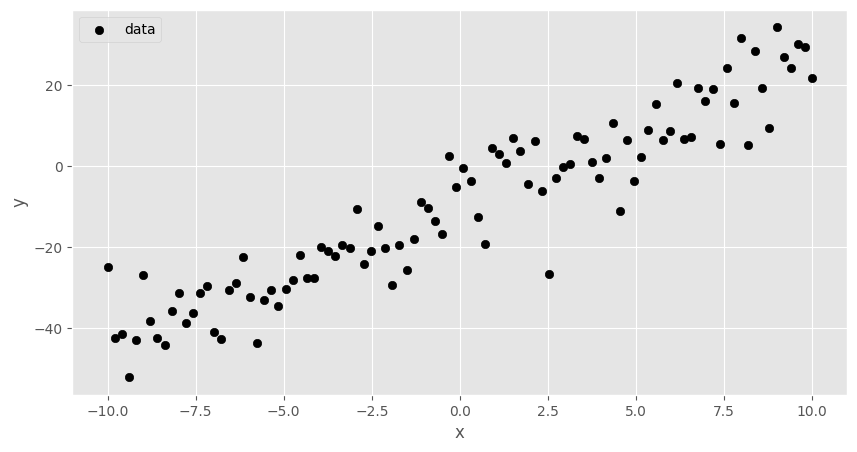

In [139]:
# style: 
plt.style.use('ggplot')

# the plot:
fig, ax = plt.subplots(figsize=(10,5))

# scatter plot:
ax.scatter(x, y, label='data', color='black')

# aesthetics:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

Clearly, even if we were to ignore the fact that we know how the data generating process (`lin_fun(x)`) works, only the visual inspection would tell us that there is a linear pattern in the data between the input variable $x$ and the target variable $y$. Therefore, if we use the linear regression, we will predict the value of $y$ by using this model: 
$$
\hat{y} = \theta_0 + \theta_1 x
$$
In substance, we need to find the intercept ($\theta_0$) and the slope ($\theta_1$) of the regression line. 

In [140]:
# we add a column of ones to the x matrix for the intercept: 
ones = np.ones(len(x))

# we stack the x and ones:
X = np.column_stack((ones, x))

# we calculate the coefficients:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'the slope is: {beta[1]:.3f}\nthe intercept is: {beta[0]:.3f}')

# we calculate the predictions:
y_hat = X @ beta
xs = np.linspace(-10,10,100)

the slope is: 3.462
the intercept is: -9.680


Now that we have computed our linear regression with the normal form equation, we plot the results: 

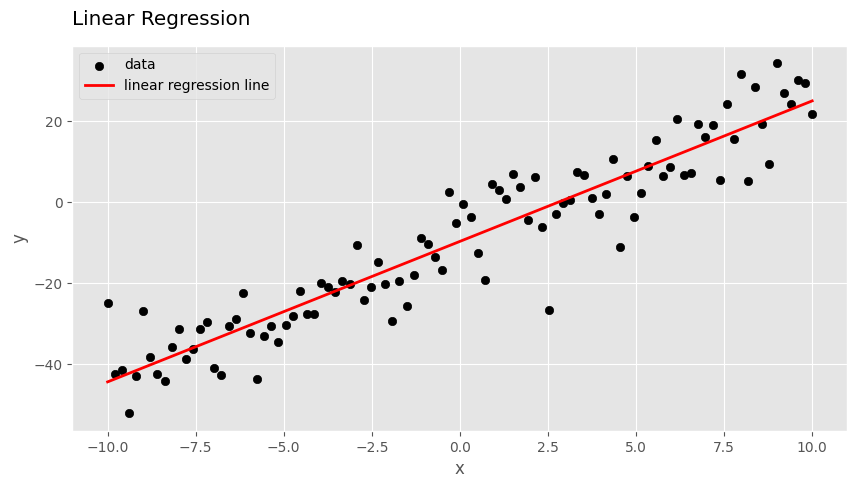

In [141]:
# the basis: 
fig, ax = plt.subplots(figsize=(10,5))

# scatter plot:
ax.scatter(x, y, label='data', color='black')

# linear regression line:
ax.plot(xs, y_hat, label='linear regression line', color='red', linewidth=2)

# aesthetics:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Linear Regression', loc='left', pad=15)
ax.legend()
plt.show()

To evalute the quality of the predictions, we can, as always, compute the root mean squared error (RMSE):

In [142]:
rmse_1 = np.sqrt(np.mean((y - y_hat)**2))
print('The RMSE is: ', round(rmse_1, 3))

The RMSE is:  7.327


Alternatively, we could have produced the same result with `scikit-learn`: 

In [143]:
from sklearn.linear_model import LinearRegression

# we create the linear regression object:
lr = LinearRegression()

# we fit the model:
lr.fit(X, y)

# we calculate the predictions:
y_hat2 = lr.predict(X)

# the mse 
rmse_2 = np.sqrt(np.mean((y - y_hat2)**2))
print('The RMSE is: ', round(rmse_2, 3))

The RMSE is:  7.327


We can also obtain the slope and the intercept: 

In [144]:
lr.coef_, lr.intercept_

(array([0.        , 3.46154045]), np.float64(-9.67955514952691))

And plot the exact same results: 

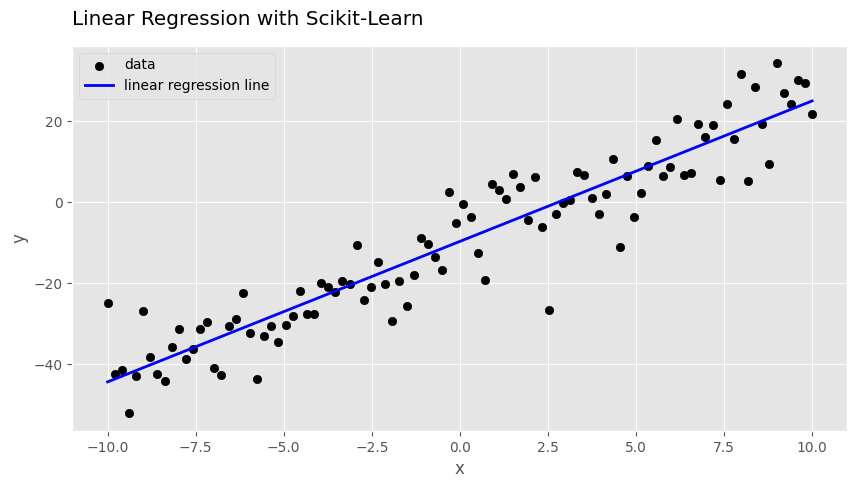

In [145]:
# the basis: 
fig, ax = plt.subplots(figsize=(10,5))

# scatter plot:
ax.scatter(x, y, label='data', color='black')

# linear regression line:
ax.plot(xs, y_hat2, label='linear regression line', color='blue', linewidth=2)

# aesthetics:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Linear Regression with Scikit-Learn', loc='left', pad=15)
ax.legend()
plt.show()

Note that the `LinearRegression()` provided by `scikit-learn` is more powerful than our simple formula since it is not directly based on a formula containing an inverse matrix but based on the *pseudoinverse* (the Moore-Penrose inverse), therefore, this makes this function resilient against singular $\mathbf{X}$. Furthermore, this function is also better since it involves less **computational complexity**. Hence, as the number of observations and features grow, the function provided by `scikit-learn` will become more and more efficient.

> 🔴 To learn more about pseudoinverses and singular value decomposition, see (Strang, 2023, pp. 286-302).

**Intermediate Conclusion**  

Now that we have studied how to *train* a linear regression model with the normal form equation, we will approach another manner to do so named **gradient descent**. This method is far more effective when handling large numbers of features or big instances to fit into memory. 

### **1.3. Gradient Descent**

**Illustrative Scenario:**  

Suppose your are located on a foggy mountain, you can't see around, and you want to find the quickest way possible to go downhill. Well, the good approach would to take the direction of the **steepest descent** at each step. This is exactly what the gradient descent means. It will seek to minimize the loss function at every *step* it makes depending on the parameter $\theta$. Once the gradient is $0$, we know that we have reached a minimum!

**Intuition**  

In practice, we start with a random vector $\theta$ and then we *update* the vector at each iteration (in the direction of the steepest descent, i.e. the negative of the gradient of the loss function with respect to the parameter $\theta$): 



![][one]

[one]: https://mlpills.dev/wp-content/uploads/2022/10/CaIB7lz-h.jpg

**The Learning Rate $\eta$: an Important Hyperparameter**

As we can see in this picture, one important hyperparameter of the gradient descent technique is the learning rate conventionally written as $\eta$. If we set $\eta$ too small, we would need a large number of iterations for the algorithms to converge. On the other hand, if we set an $\eta$ too big, it is possible that we will never converge to the $\theta$ that minimizes the mse because it will overshot each time it is close enough from the optimal $\theta$:

![][two]

[two]: https://images.javatpoint.com/tutorial/machine-learning/images/gradient-descent-in-machine-learning3.png

**The Shortcomings of Gradient Descent**  

Depending on the loss function we chose to minimize with respect to the parameters of the model, it is possible that we will face two kinds of issues: 
+ reaching a local minimum 
+ being stuck in a *plateau*

![][three]

[three]: https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ae/b0/ICLH_Diagram_Batch_03_22-AI-ML-GradientDescent.png

**Note**: The MSE is advantageous because it is a convex function with one global minimum and no plateau!

#### **1.3.1. Batch Gradient Descent**

To compute the batch gradient descent, we need to take the partial derivative of the loss function (in our case the MSE) with respect to all the different parameters $\theta_j$. In other words, we will repeat the same process as before and take the gradient of the MSE with respect to $\theta$: 

We have the mse in matrix form: 
$$
\text{MSE}(\theta) = \frac{1}{n}(X\theta - y)^2 = (X\theta - y)^T(X\theta - y)
$$
Then, we reinvest the results we presented in introduction and we obtain: 
$$
\nabla_\theta (\text{MSE}) = \frac{1}{n} \left( 2 X^T X \theta - 2 X^T y \right) = \frac{2}{n} X^T \left( X \theta - y\right)
$$

Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step. As a result it is terribly slow on very large training sets (but we will see much faster Gradient Descent algorithms shortly). However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

Now, we create a function to compute this gradient: 

In [146]:
def gradient(X, y, theta): 
    n = len(X)
    gradient = (2/n) * X.T @ (X @ theta - y)
    return gradient

Now that we have a python function for computing the gradient, we should also note the algorithm that updates the gradient: 
$$
\theta_{t+1} = \theta_t - \eta \nabla_\theta (\mathcal{L(y, \hat{y})}), \quad \text{ where } L(y, \hat{y}) \text{ is the loss function.} 
$$
In our case, we have: 
$$
\theta_{t+1} = \theta_t - \eta \left( \frac{2}{n} X^T \left( X \theta - y\right) \right)
$$
Therefore, we can implement this algorithm with the data we generated before. Remember that the convergence criteria is that $\nabla_\theta (\mathcal{L(y, \hat{y})}) \approx 0$.

In [147]:
# we initialize the parameters:
t = 0
max_t = 1000
theta = np.zeros(X.shape[1])
eta = 0.01
n = len(X)

# we initialize the list to store the loss:
losses = []
losses.append(mse(y, X @ theta))
iterations = []
iterations.append(t)
thetas = []
thetas.append(theta)
grads = []
grads.append(gradient(X, y, theta))

# we iterate over the number of epochs:
while t < max_t or np.linalg.norm(gradient(X, y, theta)) > 1e-10: # close to zero
    # we compute the gradient: 
    grad = gradient(X, y, theta)
    grads.append(grad)

    # we update the parameters:
    theta = theta - eta * grad
    thetas.append(theta)

    # we compute the loss:
    l = mse(y, X @ theta)
    losses.append(l)

    # we update the iteration:
    t += 1
    iterations.append(t)

print(theta)
thetas = np.array(thetas)
print(t)


[-9.67955515  3.46154045]
1287


It seems that we obtain almost the same parameters than with our previous linear regressions! To visualize better how the algorithm is working, we can also plot the evolution of $\theta$, the gradient, and the loss across time $t$ (i.e. the number of iterations):

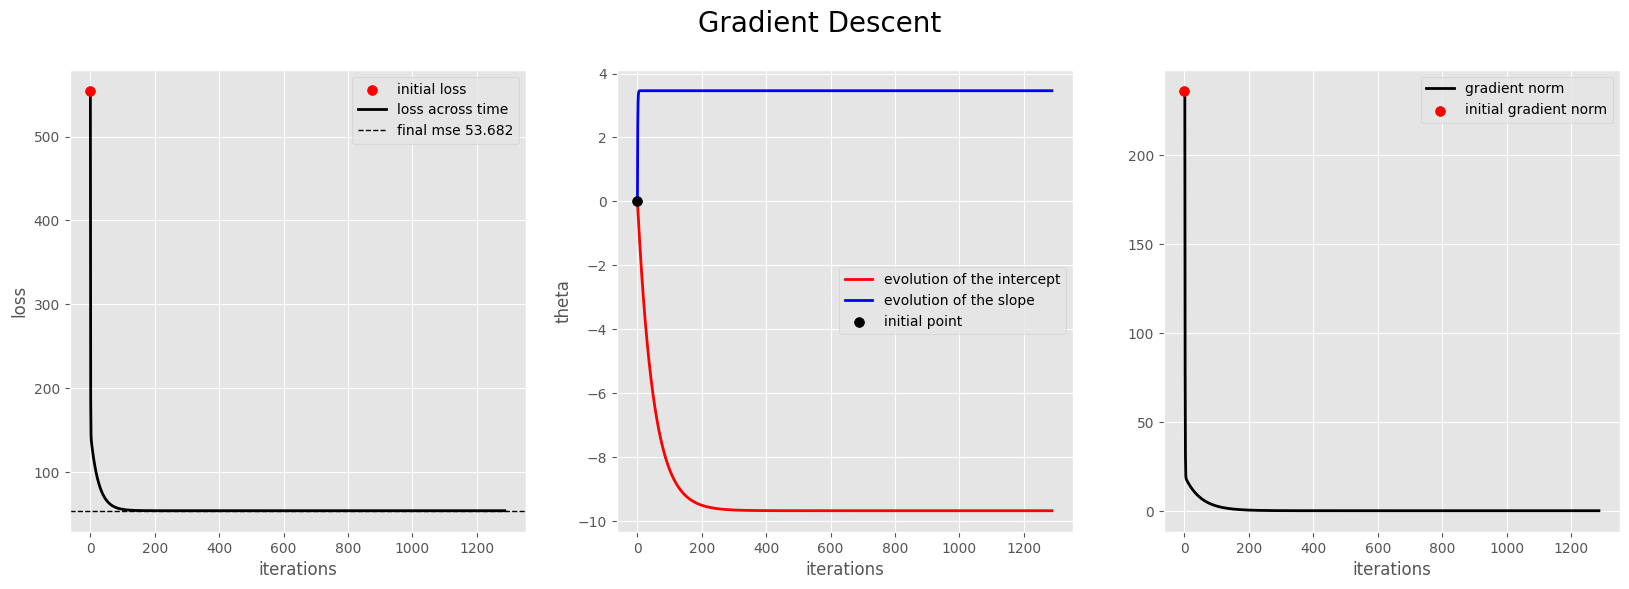

In [148]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))

# plot 1:
# initial point:
ax[0].scatter(iterations[0], losses[0], color='red', s=50, label='initial loss', zorder=3)
ax[0].set_ylabel('loss')

# plot: 
ax[0].plot(iterations, losses, color='black', linewidth=2, label='loss across time', zorder=2)

# final mse:
ax[0].axhline(losses[len(losses)-1], color='black', linewidth=1, linestyle='--', zorder=1, label=f'final mse {losses[len(losses)-1]:.3f}')

# plot 2:
ax[1].plot(iterations, thetas[:, 0], color = 'red', linewidth=2, label='evolution of the intercept', zorder=3)
ax[1].plot(iterations, thetas[:, 1], color = 'blue', linewidth=2, label='evolution of the slope', zorder=2)
ax[1].scatter(0, 0, color='black', s=50, label='initial point', zorder=4)
ax[1].set_ylabel('theta')

# plot 3:
ax[2].plot(iterations, [np.linalg.norm(g) for g in grads], color='black', linewidth=2, label='gradient norm', zorder=2)
ax[2].scatter(iterations[0], np.linalg.norm(grads[0]), color='red', s=50, label='initial gradient norm', zorder=3)

# aesthetics:
for i in range(0,3):
    ax[i].set_xlabel('iterations')
    ax[i].legend()

plt.suptitle('Gradient Descent', fontsize=20)
plt.show()

**How changing the learning rate $\eta$ affects the speed of convergence?**

Another interesting thing to study is how the number of iterations change when we vary the learning rate $\eta$. To experiment, we reproduce the same code as before but with a focus on the number of iterations: 

In [149]:
etas = np.linspace(0.001, 0.3, 1000)
total_iterations = []
max_t = 5000  # safeguard against non-convergence
grad_norms = []
for eta in etas:
    theta = np.zeros(X.shape[1])
    t = 0
    
    while np.linalg.norm(gradient(X, y, theta)) > 1e-10 and t < max_t:
        grad = gradient(X, y, theta)
        theta = theta - eta * grad

        # update the epoch t
        t += 1
    
    total_iterations.append(t)
    grad_norms.append(np.linalg.norm(gradient(X, y, theta)))



/var/folders/7v/_v_y1jpx0rl056gg5rkjsw4r0000gn/T/ipykernel_34759/515921209.py:3: RuntimeWarning: overflow encountered in matmul
  gradient = (2/n) * X.T @ (X @ theta - y)
/var/folders/7v/_v_y1jpx0rl056gg5rkjsw4r0000gn/T/ipykernel_34759/515921209.py:3: RuntimeWarning: invalid value encountered in matmul
  gradient = (2/n) * X.T @ (X @ theta - y)


Then, we plot the different etas against the number of iterations required for convergence:  

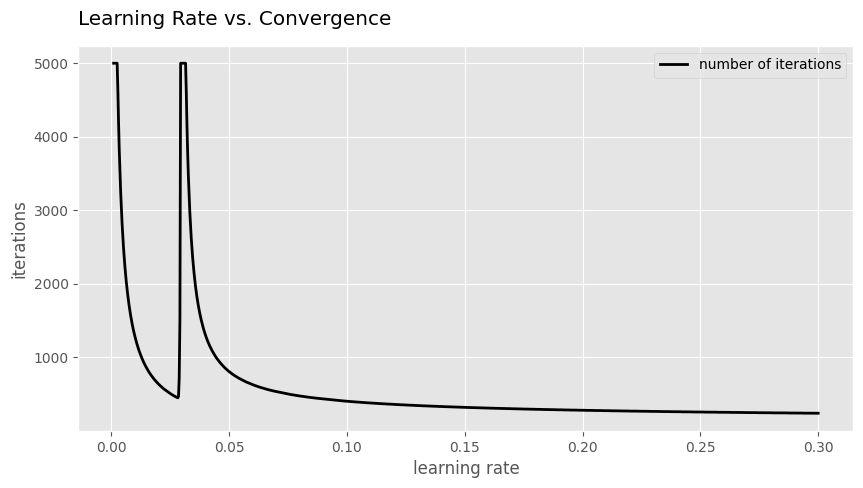

In [150]:
# the basis
fig, ax = plt.subplots(figsize=(10,5))

# plot the number of iterations:
ax.plot(etas, total_iterations, color='black', linewidth=2, label='number of iterations')


# aesthetics:
ax.set_xlabel('learning rate')
ax.set_ylabel('iterations')
ax.set_title('Learning Rate vs. Convergence', loc='left', pad=15)
ax.legend()
plt.show()

as we can see, we have an overflow warning and if we check the reason behind this overflow warning, we see that this is because the gradient norm is exploding after the threshold of $0.03$:

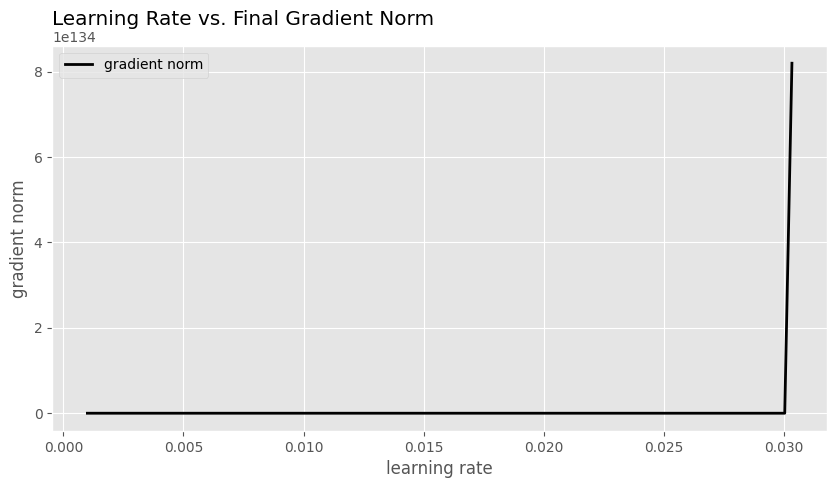

In [151]:
fig, ax = plt.subplots(figsize=(10,5))

# plot the gradient norms:
ax.plot(etas, grad_norms, color='black', linewidth=2, label='gradient norm')

# aesthetics:
ax.set_xlabel('learning rate')
ax.set_ylabel('gradient norm')
ax.set_title('Learning Rate vs. Final Gradient Norm', loc='left', pad=15)
ax.legend()
plt.show()

Now, we could reproduce the same experiment but we remain below the threshold of $0.03$:

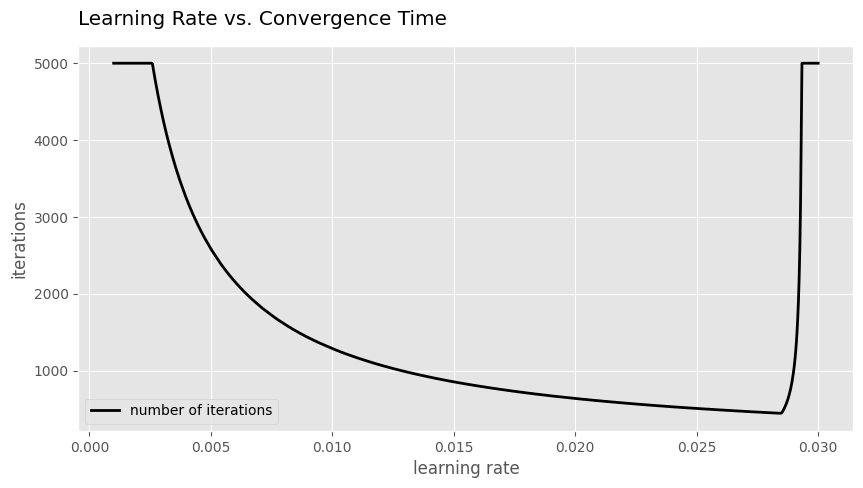

In [152]:
etas = np.linspace(0.001, 0.03, 1000)
total_iterations = []
max_t = 5000  # safeguard against non-convergence
grad_norms = []
for eta in etas:
    theta = np.zeros(X.shape[1])
    t = 0
    
    while np.linalg.norm(gradient(X, y, theta)) > 1e-10 and t < max_t:
        grad = gradient(X, y, theta)
        theta = theta - eta * grad

        # update the epoch t
        t += 1
    
    total_iterations.append(t)
    grad_norms.append(np.linalg.norm(gradient(X, y, theta)))

# the basis plot
fig, ax = plt.subplots(figsize=(10,5))

# plot the number of iterations:
ax.plot(etas, total_iterations, color='black', linewidth=2, label='number of iterations')


# aesthetics:
ax.set_xlabel('learning rate')
ax.set_ylabel('iterations')
ax.set_title('Learning Rate vs. Convergence Time', loc='left', pad=15)
ax.legend()
plt.show()

### **1.3.2. Stochastic Gradient Descent**

The main problem with batch gradient descent is the fact that it uses the whole training set to compute the gradient at every step, which make it very computationally expensive when the dataset is large. At the opposite extreme, ***stochastic gradient descent*** (SGD) picks a random instance in the training set at every step and compute the gradient only based on that single instance. 

This approach will allow us to converge progressively toward the point where the gradient reaches $0$. However, because of its stochastic nature, it won't be like batch gradient descent but more oscillating. Furthermore, at the end of the convergence process it will not settle for the most optimal value but oscillate around it. 

On another hand, SGD helps us to counter the issue of being stuck in a local minimum and not a global one. 

**Learning Rate Schedule**  

Like we discussed, SGD might not be optimal because it will not settle at the exact optimal solution. However, an ingenious method would be to program a **schedule** for the learning rate. In practice, this would mean that the closer we get from the optimal solution, the smaller the learning rate should be. However, determining how smaller it should be is not that simple... 

This code implements stochastic gradient (SGD) descent without a learning schedule: 

In [153]:
import random as rd

In [154]:
n = len(X) 
eta = 0.01
max_t = 1200 # we use a max_t comparable to what we hade with batch gradient descent

# seed
rd.seed(34)

# random initialization of theta: 
theta = np.random.rand(2, 1)

# storing the values: 
thetas = []

# main algorithm: 
for i in range(max_t):

    # we draw a random instance of X and y
    random_idx = np.random.randint(n)
    xi = X[random_idx:random_idx+1]
    yi = y[random_idx:random_idx+1]

    # we compute the gradient for these random instances: 
    grad = 2 * (xi.T@(xi@theta - yi))

    # we update theta
    theta = theta - eta * grad
    
    thetas.append(theta)


print(theta)
    


[[-9.50745698]
 [ 4.16412938]]


As we can see, this algorithm will also perform around $1200$ iterations since we set: 
```python
max_t = 1200
```
but this time it will not compute the gradient on the whole dataset but only two selected datapoints, the index of these two datapoints are drawn by: 
```python 
random_idx = np.random.randint(n)
``` 
and in the end we obtain our two values for the vector $\theta$. Furthermore, we can plot the two values across time (i.e. the different rounds of iteration): 

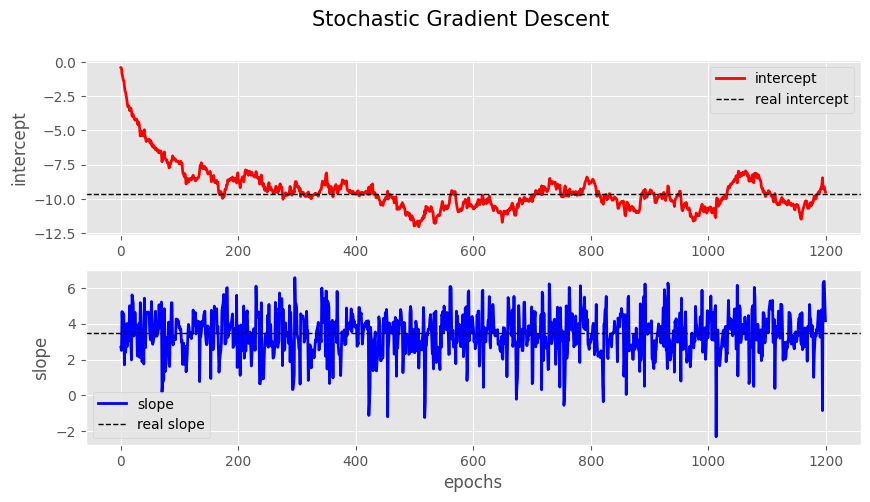

In [155]:
thetas = np.array(thetas)
thetas.reshape(max_t, 2)

# plot
fig, ax = plt.subplots(2, 1, figsize=(10,5))

# line for the first parameter:
ax[0].plot(thetas[:, 0], color='red', label='intercept', linewidth=2)
ax[0].axhline(-9.68, color='black', linestyle='--', label='real intercept', linewidth=1)

# line for the second parameter:
ax[1].plot(thetas[:, 1], color='blue', label='slope', linewidth=2)
ax[1].axhline(3.46, color='black', linestyle='--', label='real slope', linewidth=1)

# aesthetics:
ax[0].set_ylabel('intercept')
ax[1].set_ylabel('slope')
ax[1].set_xlabel('epochs')
ax[0].legend()
ax[1].legend()
plt.suptitle('Stochastic Gradient Descent', fontsize=15)

plt.show()

We can also plot how the line moves: 

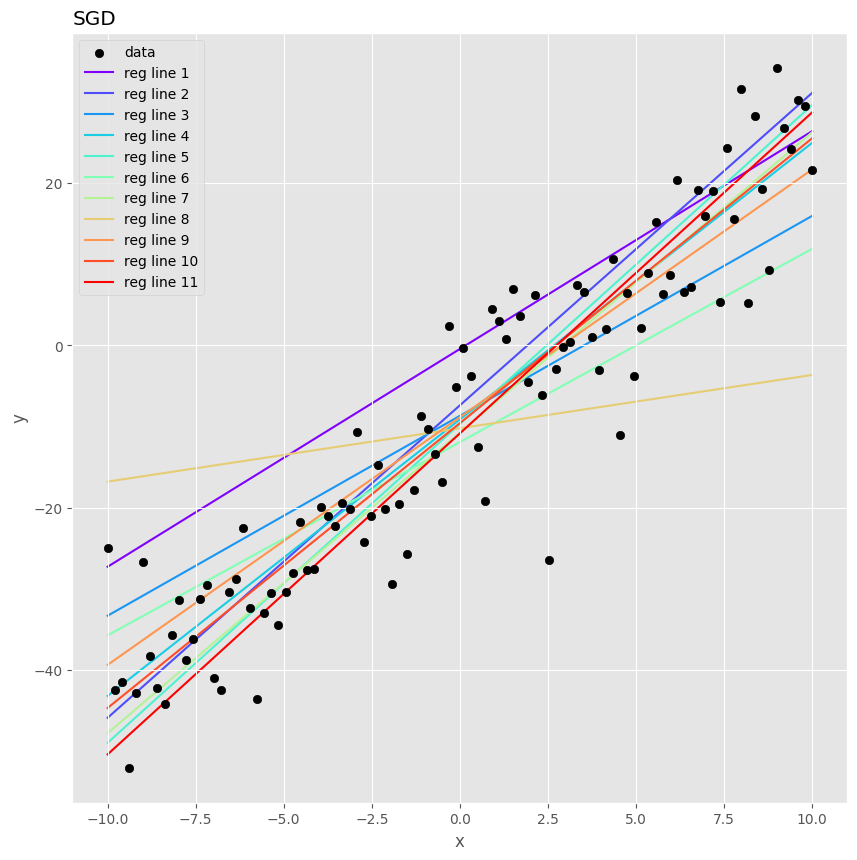

In [156]:
fig, ax = plt.subplots(figsize=(10, 10))

# the data points: 
ax.scatter(x, y, color='black', label='data')

# the linear regression lines: 
thetas_plot = [thetas[0], thetas[100], thetas[200], thetas[300], thetas[400], thetas[500], thetas[600], thetas[700], thetas[800], thetas[900], thetas[1000]]
colors = cm.rainbow(np.linspace(0, 1, len(thetas_plot)))
counter = 1
for theta, color in zip(thetas_plot, colors): 
    y_pred = theta[0] + theta[1]*xs
    ax.plot(xs, y_pred, color=color, alpha=1, zorder=0, label=f'reg line {counter}')
    ax.legend()
    counter += 1

# aesthetics:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('SGD', loc='left')
plt.show()


#### Stochastic Gradient Descent with Learning Schedule

Now, we will increase the power of our algorithm by adding a learning schedule. This learning schedule was not in the book of A. Géron. Indeed, below is one well-regarded approach: a **cosine annealing schedule with warm-up**. This schedule has become popular (for example, in the “SGDR” paper by Loshchilov and Hutter) because it allows the learning rate to start high, helping rapid progress in the early epochs, then smoothly decay in a cosine shape to a lower bound to fine-tune the parameters later. Before implementing it, we present the general idea based on the paper:  

**Loshchilov**, I., & **Hutter**, F. (2016). SGDR: Stochastic gradient descent with warm restarts. *arXiv preprint arXiv:1608.03983*.

#### Stochastic Gradient Descent with Warm Restarts (Loshchilov & Hutter, 2016)

The existing restart techniques can also be used for stochastic gradient descent if the stochasticity is taken into account. Since gradients and loss values can vary widely from one batch of the data to another, one should denoise the incoming information: by considering averaged gradients and losses, e.g., once per epoch, the above-mentioned restart techniques can be used again. In this work, we consider one of the simplest warm restart approaches. We simulate a new warm-started run / restart of SGD once $T_i$ epochs are performed, where $i$ is the index of the run. Importantly, the restarts are not performed from scratch but emulated by increasing the learning rate $\eta_t$ while the old value of $x_t$ is used as an initial solution. The amount of this increase controls to which
extent the previously acquired information (e.g., momentum) is used. Within the $i$-th run, we decay the learning rate with a cosine annealing for each batch as follows:
$$
\eta_t = \eta_{min}^i + \frac{1}{2}\left( \eta_{max}^i - \eta_{min}^i\right)(1 + \text{cos}(\frac{T_{cur}}{T_i}\pi))  
$$
where $\eta^i_{min}$ and $\eta^i_{max}$ are ranges for the learning rate, and Tcur accounts for how many epochs have been performed since the last restart. Since $T_{cur}$ is updated at each batch iteration $t$, it can take discredited values such as $0.1$, $0.2$, etc. Thus, $\eta_t = \eta_{max}^i$ when $t = 0$ and $T_{cur} = 0$. Once $T_{cur} = T_i$, the cos function will output $−1$ and thus $\eta_t = \eta_{min}^i$.

In [157]:
def cosine_annealing_lr(epoch, total_epochs, initial_lr, min_lr=1e-6, warmup_epochs=10):
    """
    Compute the learning rate for the given epoch using a cosine annealing schedule with optional warm-up.
    
    Parameters:
      epoch         : int, current epoch (0-indexed)
      total_epochs  : int, total number of epochs
      initial_lr    : float, the starting (maximum) learning rate
      min_lr        : float, the minimum learning rate to anneal to (default: 1e-6)
      warmup_epochs : int, number of epochs for the warm-up phase (default: 5)
    
    Returns:
      lr : float, the computed learning rate for the current epoch.
    """
    # Warm-up phase: linearly increase the learning rate
    if epoch < warmup_epochs:
        lr = initial_lr * (epoch + 1) / warmup_epochs
    else:
        # Adjust the epoch count to start after warm-up
        adjusted_epoch = epoch - warmup_epochs
        adjusted_total = total_epochs - warmup_epochs
        # Cosine annealing: decays from initial_lr to min_lr over the remaining epochs.
        cosine_decay = 0.5 * (1 + np.cos(np.pi * adjusted_epoch / adjusted_total))
        lr = min_lr + (initial_lr - min_lr) * cosine_decay
    return lr

In [158]:
# this time, we add epochs because we want to update the learning rate at each epoch
max_epoch = 100

# the max number of iterations at each epoch
max_t = 1200

# the initial parameters
n = len(X)
t = 0
k = 10
eta = 0.01

# theta
theta = np.random.randn(2, 1)
thetas = []
thetas.append(theta)

# the seed
rd.seed(34)
np.random.seed(42)

# tracking the learning rate:
etas = []
etas.append(eta)

# the algorithm: 
for epoch in range(max_epoch-1): 
    while t <= max_t: 

        # draw the indices
        rd_idx = np.random.randint(low=0, high=n)

        # the sample: 
        xi = X[rd_idx:rd_idx+1]
        yi = y[rd_idx:rd_idx+1]

        # the gradient
        grad = 2 * (xi.T@(xi@theta - yi)) # n = 1

        # update theta:
        theta = theta - np.abs(eta) * grad # we make sure that eta is positive

        # update the time t
        t += 1

    # reset t 
    t = 0

    # add the new theta to the list: 
    thetas.append(theta.copy())

    # update the learning rate
    eta = cosine_annealing_lr(epoch=epoch, total_epochs=max_epoch, initial_lr=eta, min_lr=1e-6, warmup_epochs=5)
    etas.append(eta)


print(theta)





[[-9.85062208]
 [ 3.46848449]]


We reshape the array for plotting: 

In [159]:
thetas = np.array(thetas).reshape(100, 2)

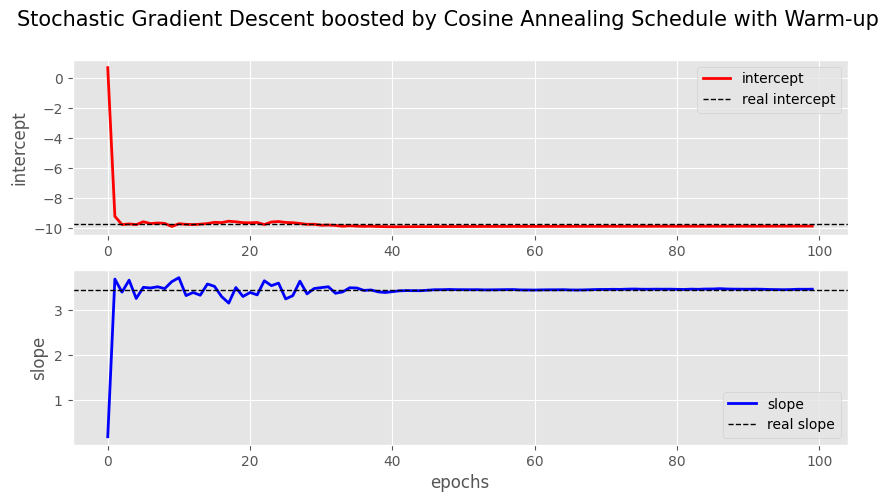

In [160]:
# plot
fig, ax = plt.subplots(2, 1, figsize=(10,5))

# line for the first parameter:
ax[0].plot(thetas[:, 0], color='red', label='intercept', linewidth=2)
ax[0].axhline(-9.68, color='black', linestyle='--', label='real intercept', linewidth=1)

# line for the second parameter:
ax[1].plot(thetas[:, 1], color='blue', label='slope', linewidth=2)
ax[1].axhline(3.46, color='black', linestyle='--', label='real slope', linewidth=1)

# aesthetics:
ax[0].set_ylabel('intercept')
ax[1].set_ylabel('slope')
ax[1].set_xlabel('epochs')
ax[0].legend()
ax[1].legend()
plt.suptitle('Stochastic Gradient Descent boosted by Cosine Annealing Schedule with Warm-up', fontsize=15)

plt.show()

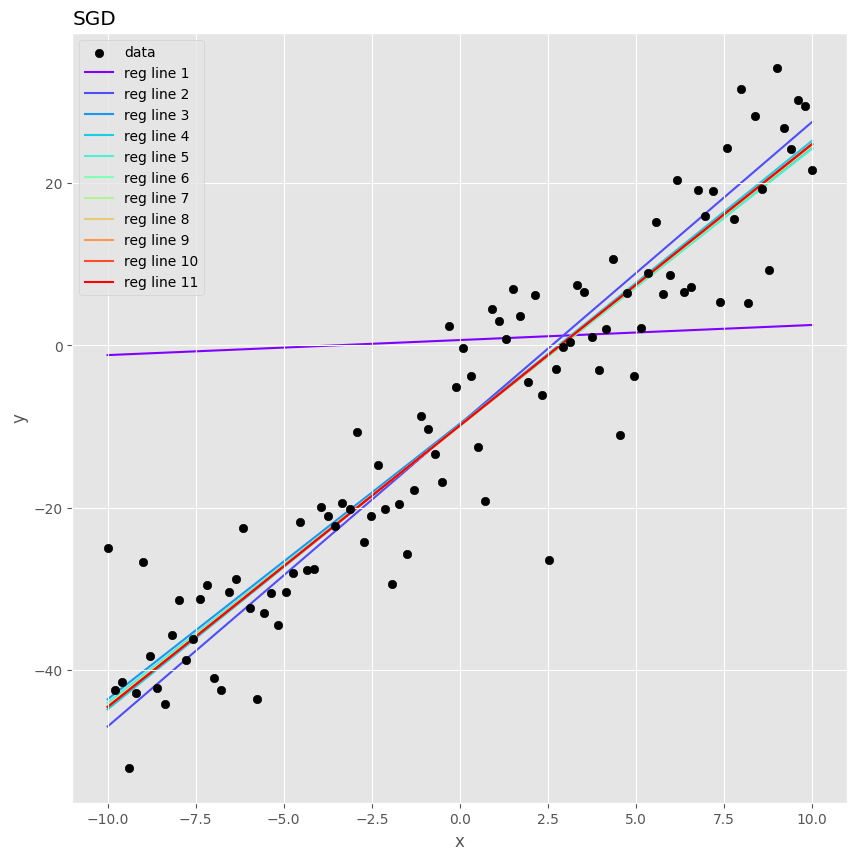

In [161]:
fig, ax = plt.subplots(figsize=(10, 10))

# the data points: 
ax.scatter(x, y, color='black', label='data')

# the linear regression lines: 
thetas_plot = [thetas[0], thetas[10], thetas[20], thetas[30], thetas[40], thetas[50], thetas[60], thetas[70], thetas[80], thetas[90], thetas[99]]
colors = cm.rainbow(np.linspace(0, 1, len(thetas_plot)))
counter = 1
for theta, color in zip(thetas_plot, colors): 
    y_pred = theta[0] + theta[1]*xs
    ax.plot(xs, y_pred, color=color, alpha=1, zorder=0, label=f'reg line {counter}')
    ax.legend()
    counter += 1

# aesthetics:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('SGD', loc='left')
plt.show()

We can also observe how the learning rate $\eta$ changes across the different epochs: 

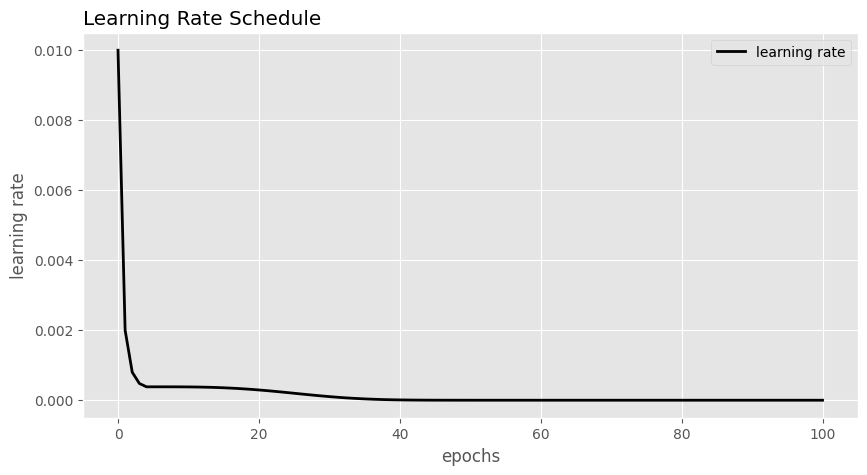

In [162]:
# the main plot: 
fig, ax = plt.subplots(figsize=(10,5))

# the line
ax.plot(np.linspace(0, 100, 100), etas, color='black', linewidth=2, label='learning rate')

# aesthetics:
ax.set_xlabel('epochs')
ax.set_ylabel('learning rate')
ax.set_title('Learning Rate Schedule', loc='left')
ax.legend()
plt.show()

#### Intermediate Conclusion

Wooow! 🤯  
It’s remarkable to see how an efficient learning schedule, like cosine annealing, transforms the convergence behavior of our two parameters. In our initial approach, we struggled to get close to the optimal values—our parameters were oscillating around the target. However, with cosine annealing, convergence is significantly faster and the numerical stability is greatly improved. In fact, the results nearly match those achieved with batch gradient descent. This example clearly demonstrates the critical role that a well-designed learning schedule plays in optimization.

#### **1.3.3. Mini-Batch Gradient Descent**

Mini-batch gradient desdent is really straightforward to understand once we have explored batch GD and SGD. This time, instead of computing the gradient on  the entire dataset (batch) or only on one random instance of the dataset (SGD), we will select $k$ random instances and compute the gradient on these $k$ random instances. Then, we say that the set of these $k$ instances if the mini-batch, a mini-batch of size $k$. 

We can easily implement an algorithm to display this (without learning schedule): 

In [163]:
# initial parameters
#####################
# theta
theta = np.zeros(2)
thetas = []
thetas.append(theta)

# the seed
np.random.seed(42)

# the settings
n = len(X)
t = 1
k = 20 # batch size
eta = 0.01
max_t = 10000

# the algorithm:
#################

while t < max_t and np.linalg.norm(gradient(X, y, theta)) > 1e-8: # close to zero
    # 1. draw the indices
    rd_idx = np.random.choice(n, size=k)

    # 2. the sample
    x_batch = X[rd_idx]
    y_batch = y[rd_idx]

    # 3. the gradient
    grad = 2/k * (x_batch.T@(x_batch@theta - y_batch))

    # 4. update theta
    theta = theta - eta * grad

    # 5. store the theta
    thetas.append(theta.copy())

    # 6. update the time
    t += 1

# the final parameters
print(theta)

if t == max_t: 
    print(f'The algorithm did not converge, max iterations were {max_t}')
else:
    print(f'The algorithm converged in {t} iterations')



[-9.82524208  3.360772  ]
The algorithm did not converge, max iterations were 10000


We can illustrate how the parameters ($\theta_0$ and $\theta_1$) evolve in the parameter space: 

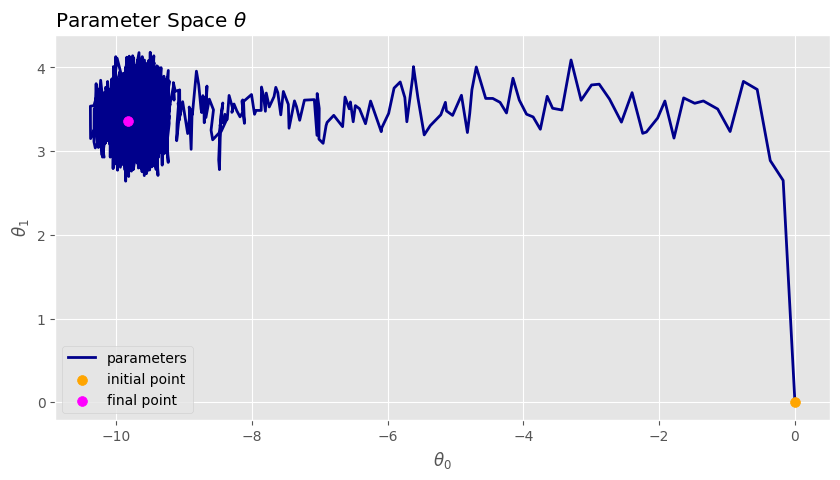

In [164]:
# the parameters:
thetas = np.array(thetas).reshape(t, 2)
theta_0 = thetas[:, 0]
theta_1 = thetas[:, 1]

# the plot
###########

fig, ax = plt.subplots(figsize=(10,5))

# the evolution of the parameters
ax.plot(theta_0, theta_1, color='darkblue', linewidth=2, label='parameters')

# the starting point
ax.scatter(theta_0[0], theta_1[0], color='orange', s=50, label='initial point', zorder=5)

# the final point
ax.scatter(theta_0[len(theta_0)-1], theta_1[len(theta_1)-1], color='magenta', s=50, label='final point', zorder=5)

# aesthetics
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title(r'Parameter Space $\theta$', loc='left')
ax.legend()
plt.show()

## **2. Polynomial Regression**

### **2.1. General Concepts & Example**

In the first section `1. Linear Regression` we discovered different algorithms (the normal form equation, GD, SGD, mini-batch GD–GD is useful in many other areas) that allows us to represent a linear relationship between an input $X$ and an output $y$ like:
$$
y = \hat{y} + \epsilon_i \Leftrightarrow y = X\theta + \epsilon_i \quad\text{ and in our working example, we had:}
$$
$$
\hat{y} = \theta_0 + \theta_1 x_1
$$
This resulted in plotting a regression line in our scatter plot. However, even if we are using linear model, we can also capture non-linear patterns with linear models. To understand this better, let's work with simulated data: 

First, we code a quadratic function that will generate data with a non-linear relationship: 

In [165]:
def quadra(x): 

    # the seed:
    np.random.seed(42)

    # the length of x:
    n = len(x)

    # coeff 1: 
    a = np.random.uniform(-5, 5)

    # coeff 2:
    b = np.random.uniform(-4, 4)

    # the intercept:
    c = np.random.randint(-10, 10)

    # the noise (a different one for each x):
    e = np.random.normal(-10, 10, size=n)

    # the quadratic function:
    y = a*x**2 + b*x + c + e

    return y



the data: 

In [166]:
# we generate the data:
x = np.linspace(-10,10,100)
y = quadra(x)

we plot the data: 

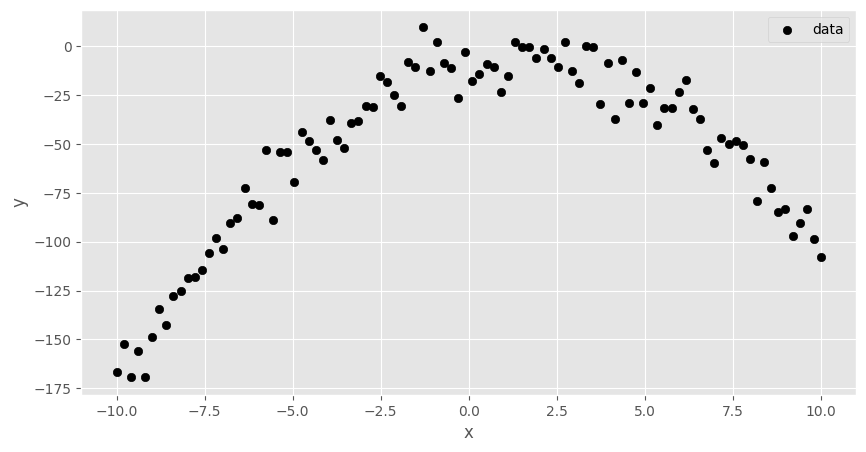

In [167]:
fig, ax = plt.subplots(figsize=(10,5))

# scatter plot:
ax.scatter(x, y, label='data', color='black')

# aesthetics:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

Clearly, in this case a line would probably not be the best fit. However, we could still use the normal equation but this time we would predict three theta values:
$$
\hat{y} = \theta_0 + \theta_1 x + \theta_2 x^2
$$
🔴 Note that it is **still considered linear regression**, as the model is still linear in the parameters $\theta_0, \theta_1, \dots, \theta_k$.
To be formal, this means that we are considering the hypothesis class:

$$
\mathcal{H} = \left\{ f_{\boldsymbol{\theta}, k}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \dots + \theta_k x^k \mid \theta_0, \theta_1, \dots, \theta_k \in \mathbb{R}, k \in \mathbb{N} \right\}.
$$

Now, let's write a function that will generate these features for us (beware that we only have one feature! Otherwise, we should code another function):

In [168]:
def poly_1f(x, degree): 

    n = len(x)

    # ensure consistency: 
    x = np.array(x).reshape(n , 1)

    # we first create an empty matrix with n rows and k columns, where k is the max degree:
    X = np.zeros((n, degree+1))

    # we add the polynomial features:
    for i in range(degree+1): 
        X[:, i] = (x**i).flatten() # use .flatten() since numpy expects 1D array here

    # return the final matrix:
    return X

Now, let's test quickly our function `poly_1f()` with a simple vector: 
$$
a = 
\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}
$$

In [169]:
a = np.array([1, 2, 3])

In [170]:
A = poly_1f(a, degree=2)
A

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

note that the first column is only ones but this is normal (we want to account for the bias). Therefore, our function `poly_1f()` seems to work! Now, let's try it on our data: 

In [171]:
X = poly_1f(x, degree = 2)
X

array([[ 1.00000000e+00, -1.00000000e+01,  1.00000000e+02],
       [ 1.00000000e+00, -9.79797980e+00,  9.60004081e+01],
       [ 1.00000000e+00, -9.59595960e+00,  9.20824406e+01],
       [ 1.00000000e+00, -9.39393939e+00,  8.82460973e+01],
       [ 1.00000000e+00, -9.19191919e+00,  8.44913784e+01],
       [ 1.00000000e+00, -8.98989899e+00,  8.08182838e+01],
       [ 1.00000000e+00, -8.78787879e+00,  7.72268136e+01],
       [ 1.00000000e+00, -8.58585859e+00,  7.37169677e+01],
       [ 1.00000000e+00, -8.38383838e+00,  7.02887460e+01],
       [ 1.00000000e+00, -8.18181818e+00,  6.69421488e+01],
       [ 1.00000000e+00, -7.97979798e+00,  6.36771758e+01],
       [ 1.00000000e+00, -7.77777778e+00,  6.04938272e+01],
       [ 1.00000000e+00, -7.57575758e+00,  5.73921028e+01],
       [ 1.00000000e+00, -7.37373737e+00,  5.43720029e+01],
       [ 1.00000000e+00, -7.17171717e+00,  5.14335272e+01],
       [ 1.00000000e+00, -6.96969697e+00,  4.85766758e+01],
       [ 1.00000000e+00, -6.76767677e+00

Nice, it seems to work! Now, let's find the optimal value of the vector $\theta$ for the closed form equation:

In [172]:
theta = np.linalg.inv(X.T@X)@X.T@y
theta

array([-8.59866159,  3.59132255, -1.29969781])

to make the whole process more efficient, let's incorporate this into out (new) function: 

In [173]:
def linreg_poly_1f(x, y, degree):
    X = poly_1f(x, degree)
    theta = np.linalg.inv(X.T@X)@X.T@y
    theta = theta.reshape(degree + 1, 1)
    return X, theta

let's try this: 

In [174]:
X, theta = linreg_poly_1f(x, y, degree=2)
theta

array([[-8.59866159],
       [ 3.59132255],
       [-1.29969781]])

Wonderful, now, with the simple function we coded, we can generate (for one feature dataset) $k$ polynomial features and directly fit our data with the normal form equation. Finally, we can make our predicions and evaluate them:

In [175]:
from sklearn.metrics import mean_squared_error as mse

y_pred = X @ theta
rmse_linreg_poly = np.sqrt(mse(y, y_pred))
print(rmse_linreg_poly)

9.13670438991626


Now, it would be interesting to see which $k$ is optimal for having the lower mse possible. For this, we can proceed as follows: 

In [176]:
# store the rmses
rmses = []

for k in range(1, 20):
    X, theta = linreg_poly_1f(x, y, degree=k)
    y_pred = X @ theta
    rmse = float(np.sqrt(mse(y, y_pred)))

    # store the results:
    rmses.append(rmse)

We can plot the evolution of the rmses: 

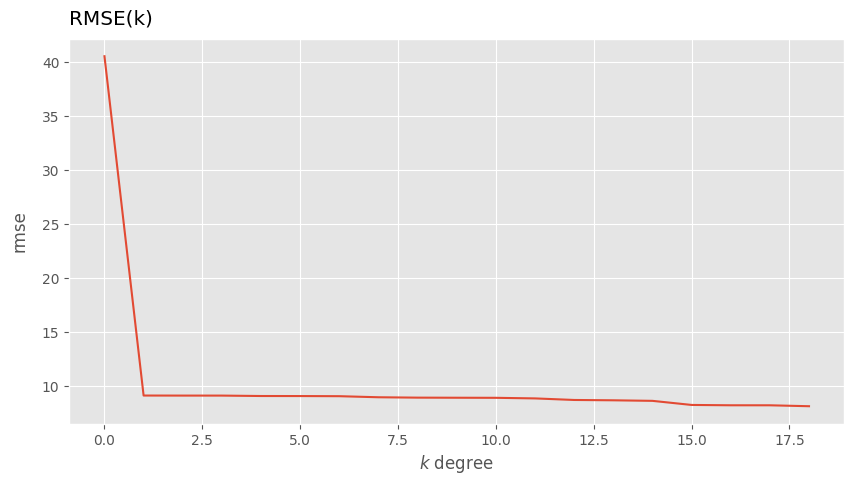

In [177]:
fig, ax = plt.subplots(figsize=(10, 5))

# the evolution of the rmses: 
ax.plot([i for i in range(len(rmses))], rmses)

# aesthetics
ax.set_xlabel(r"$k$ degree")
ax.set_ylabel('rmse', labelpad=10)
ax.set_title('RMSE(k)', loc='left', pad=10)
plt.show()

Here, we could have the impression that the higher the $k$, the better our predicitons. However, remember that here we do not have a train and test set, otherwise it would not look like this. Indeed we are overfitting the data:

we code a function to plot the polynomial:

In [178]:
def poly_fun(theta, x):
    theta = np.squeeze(theta) 
    n = len(theta)
    ks = np.arange(1, n)  # Exponents from 1 to n
    y = 0

    for k in ks:
        y += theta[k] * (x ** k)
    
    return y

we re-generate the data: 

In [179]:
# we generate the data:
x = np.linspace(-10,10,100)
y = quadra(x)

we use $k = 20$ for our example:

In [180]:
k = 20
X, theta = linreg_poly_1f(x, y, degree = k)
y_poly = poly_fun(theta, x)

the plot:

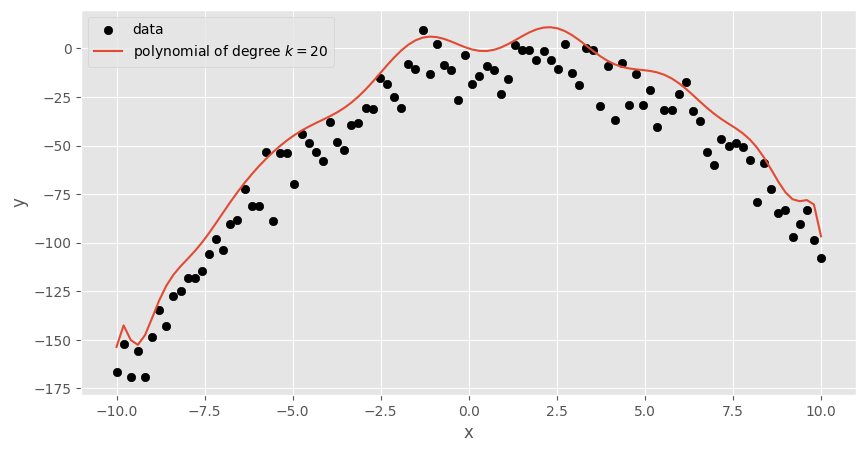

In [181]:
fig, ax = plt.subplots(figsize=(10,5))

# scatter plot:
ax.scatter(x, y, label='data', color='black')

# the polynomial:
ax.plot(x, y_poly, label=fr'polynomial of degree $k ={k} $')

# aesthetics:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

The fact that we are underfitting can be demonstrated by the usage of a test set: 

In [182]:
# train and test data
from sklearn.model_selection import train_test_split

# we generate the data:
x = np.linspace(-10,10,100)
y = quadra(x)

# we split the data:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

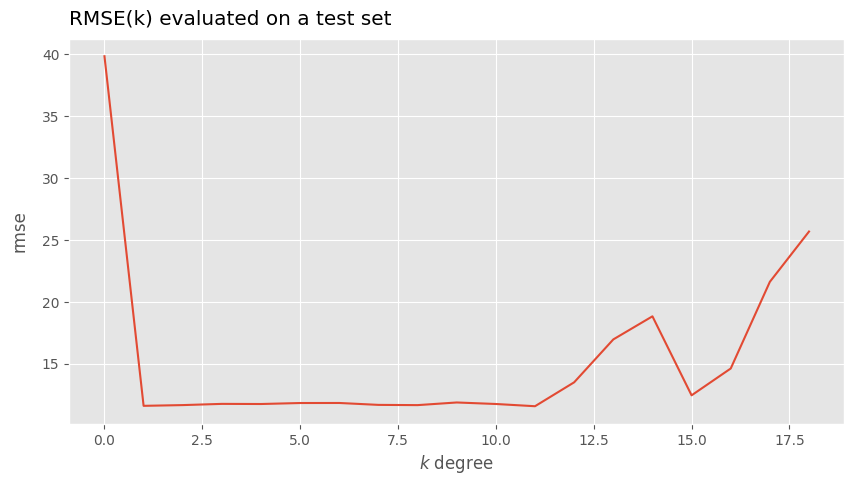

In [183]:
rmses = []

for k in range(1, 20):
    X, theta = linreg_poly_1f(x_train, y_train, degree=k)

    # transform the test data:
    X_test = poly_1f(x_test, degree=k)

    y_pred =  X_test @ theta
    rmse = float(np.sqrt(mse(y_test, y_pred)))

    # store the results:
    rmses.append(rmse)

fig, ax = plt.subplots(figsize=(10, 5))

# the evolution of the rmses:
ax.plot([i for i in range(len(rmses))], rmses)

# aesthetics
ax.set_xlabel(r"$k$ degree")
ax.set_ylabel('rmse', labelpad=10)
ax.set_title('RMSE(k) evaluated on a test set', loc='left', pad=10)
plt.show()

### **2.2. Learning Curves**

In general, we will fit the data best with a non-linear model (if there is no clear linear pattern). However, once we settle for using polynomial regression, we will quickly stumble upon another issue, namely "how to choose the model's complexity?".

In Chapter 2 we used cross-validation to get an estimate of a model’s generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

Another way to tell is to look at the ***learning curves***: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, train the model several times on different sized subsets of the training set. Here is some code to plot the learning curves: 

In [184]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

# we create a function that will plot the learning curves:
'''
The function plot_learning_curves takes as input:
- the model (e.g. LinearRegression())
- X, the features
- y, the target
'''

def plot_learning_curves(model, X, y):

    # we split the data:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # we will use different size of batches for training the model:
    n = len(X_train)

    # we will store the errors:
    train_errors, val_errors = [], []

    # we iterate over the number of instances:
    for batch_size in range(n):

        # we train the model with the first batch_size instances:
        model.fit(X_train[:batch_size+1], y_train[:batch_size+1])

        # we make the predictions on both the train an validation set:
        y_train_predict = model.predict(X_train[:batch_size+1])
        y_val_predict = model.predict(X_val)

        # we compute the mse for both the train and validation set: 
        train_errors.append(mse(y_train[:batch_size+1], y_train_predict))
        val_errors.append(mse(y_val, y_val_predict))

    # we plot the learning curves:
    fig, ax = plt.subplots(figsize=(10,5))

    # the training error:
    ax.plot(np.sqrt(train_errors), label='train', color='red', linewidth=2)

    # the validation error:
    ax.plot(np.sqrt(val_errors), label='validation', color='blue', linewidth=2)

    # aesthetics:
    ax.set_xlabel('batch size')
    ax.set_ylabel('rmse')
    ax.set_title('Learning Curves', loc='left', pad=15)
    ax.set_ylim(0, n)
    ax.legend()
    plt.show()

Now, we can try our function with our simulated data and the simple model `LinearRegression()`:

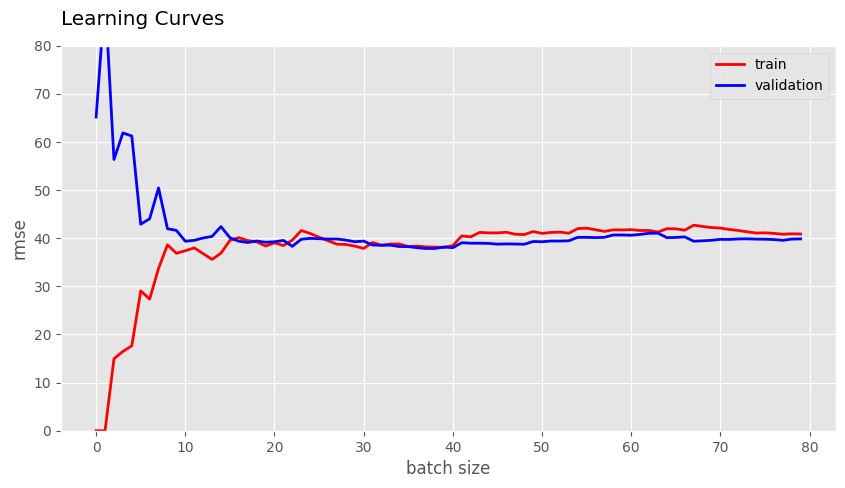

In [185]:
# we reload the data:
x = np.linspace(-10,10,100)
y = quadra(x)
X = np.hstack((np.ones(len(x)).reshape(-1, 1), x.reshape(-1, 1)))

plot_learning_curves(model=LinearRegression(), X=X, y=y)

This model that’s underfitting deserves a bit of explanation. First, let’s look at the per‐
formance on the training data: when there are just one or two instances in the train‐
ing set, the model can fit them perfectly, which is why the curve starts at zero. But as
new instances are added to the training set, it becomes impossible for the model to fit
the training data perfectly, both because the data is noisy and because it is not linear
at all. So the error on the training data goes up until it reaches a plateau, at which
point adding new instances to the training set doesn’t make the average error much
better or worse. Now let’s look at the performance of the model on the validation
data. When the model is trained on very few training instances, it is incapable of gen‐
eralizing properly, which is why the validation error is initially quite big.

Now, let's look at the learning curves of polynomial regressor:

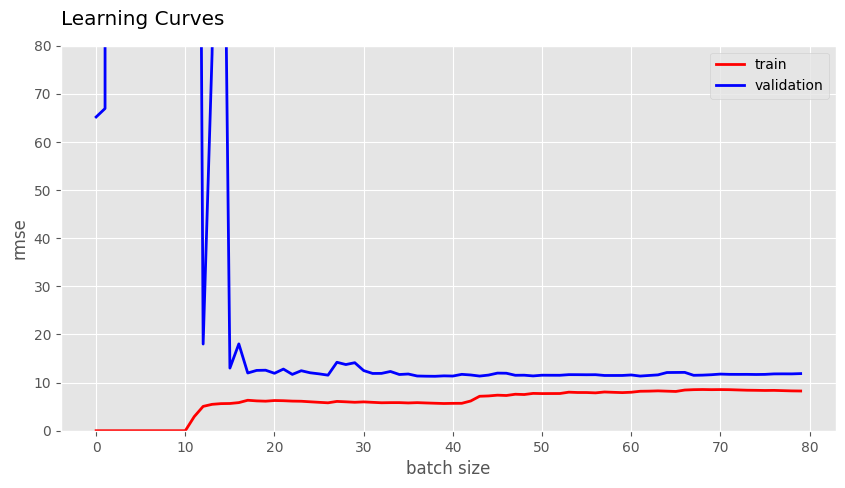

In [186]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# we create a pipeline:
poly_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=True)),
    ('lin_reg', LinearRegression())
])

# we reload the data:
x = np.linspace(-10,10,100)
y = quadra(x)
X = np.hstack((np.ones(len(x)).reshape(-1, 1), x.reshape(-1, 1)))

# we plot the learning curves:
plot_learning_curves(model=poly_reg, X=X, y=y)



These learning curves look a bit like the previous ones, but there are two very impor‐
tant differences:

+ The error on the training data is much lower than with the Linear Regression
model.
+ There is a gap between the curves. This means that the model performs signifi‐
cantly better on the training data than on the validation data, **which is the hallmark of an overfitting model**. If you used a much larger training set, however, the two curves would continue to get closer.

#### Bias-Variance Trade-Off

An important theoretical result of statistics and Machine Learning is the fact that a
model’s generalization error can be expressed as the sum of three very different
errors:
+ **Bias**
This part of the generalization error is due to wrong assumptions, such as assum‐
ing that the data is linear when it is actually quadratic. A high-bias model is most
likely to underfit the training data.  

+ **Variance**
This part is due to the model’s excessive sensitivity to small variations in the
training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.  

+ **Irreducible error**
This part is due to the noisiness of the data itself. The only way to reduce this
part of the error is to clean up the data (e.g., fix the data sources, such as broken
sensors, or detect and remove outliers).
Increasing a model’s complexity will typically increase its variance and reduce its bias.
Conversely, reducing a model’s complexity increases its bias and reduces its variance.
This is why it is called a trade-off.

We can apprehend mathematically the bias variance trade off by developing the minimization problem we face with the squared loss: 
$$
E((y - \hat{y})^2) = E(y^2 - 2y\hat{y} + \hat{y}^2) = E(y^2) - 2E(y\hat{y}) + E(\hat{y}^2)
$$
Now, we should note that: 
$$
y = f(x) + \epsilon, \quad \epsilon \text{ is the error term. }
$$
and we also should note that $E(\epsilon) = 0$, unbiased data generating process.
Hence, we have: 
$$
E(f(x)^2 + \epsilon^2 + 2\epsilon f(x)) - 2 E((f(x) + \epsilon)\hat{y}) + Var(\hat{y}) + E(\hat{y})^2
$$
$$
= f(x)^2 + E(\epsilon^2) - 2 f(x)E(\hat{y}) + Var(\hat{y}) + E(\hat{y})^2
$$
$$
= f(x)^2 + Var(\epsilon) - 2 f(x)E(\hat{y}) + Var(\hat{y}) + E(\hat{y})^2
$$
$$
\underbrace{\left( f(x) - E(\hat{y})\right)^2}_{\text{Bias}^2} + \underbrace{Var(\hat{y})}_{\text{Variance}} + \underbrace{Var(\epsilon)}_{\text{irreducible error}}
$$
As we can see, we seek to minimize the bias (squared) and the variance of our estimator $\hat{y}$. Basically, the bias represent the divergence of the *mean* of our estimator from the *mean* of the data generating process–$f(x)$. Usually, when the complexity of our model increases, the bias is reduced because we fit our data closer. However, as we increase the complexity of our estimator, the variance also increase (potential overfitting). This is why we speak of a trade-off.


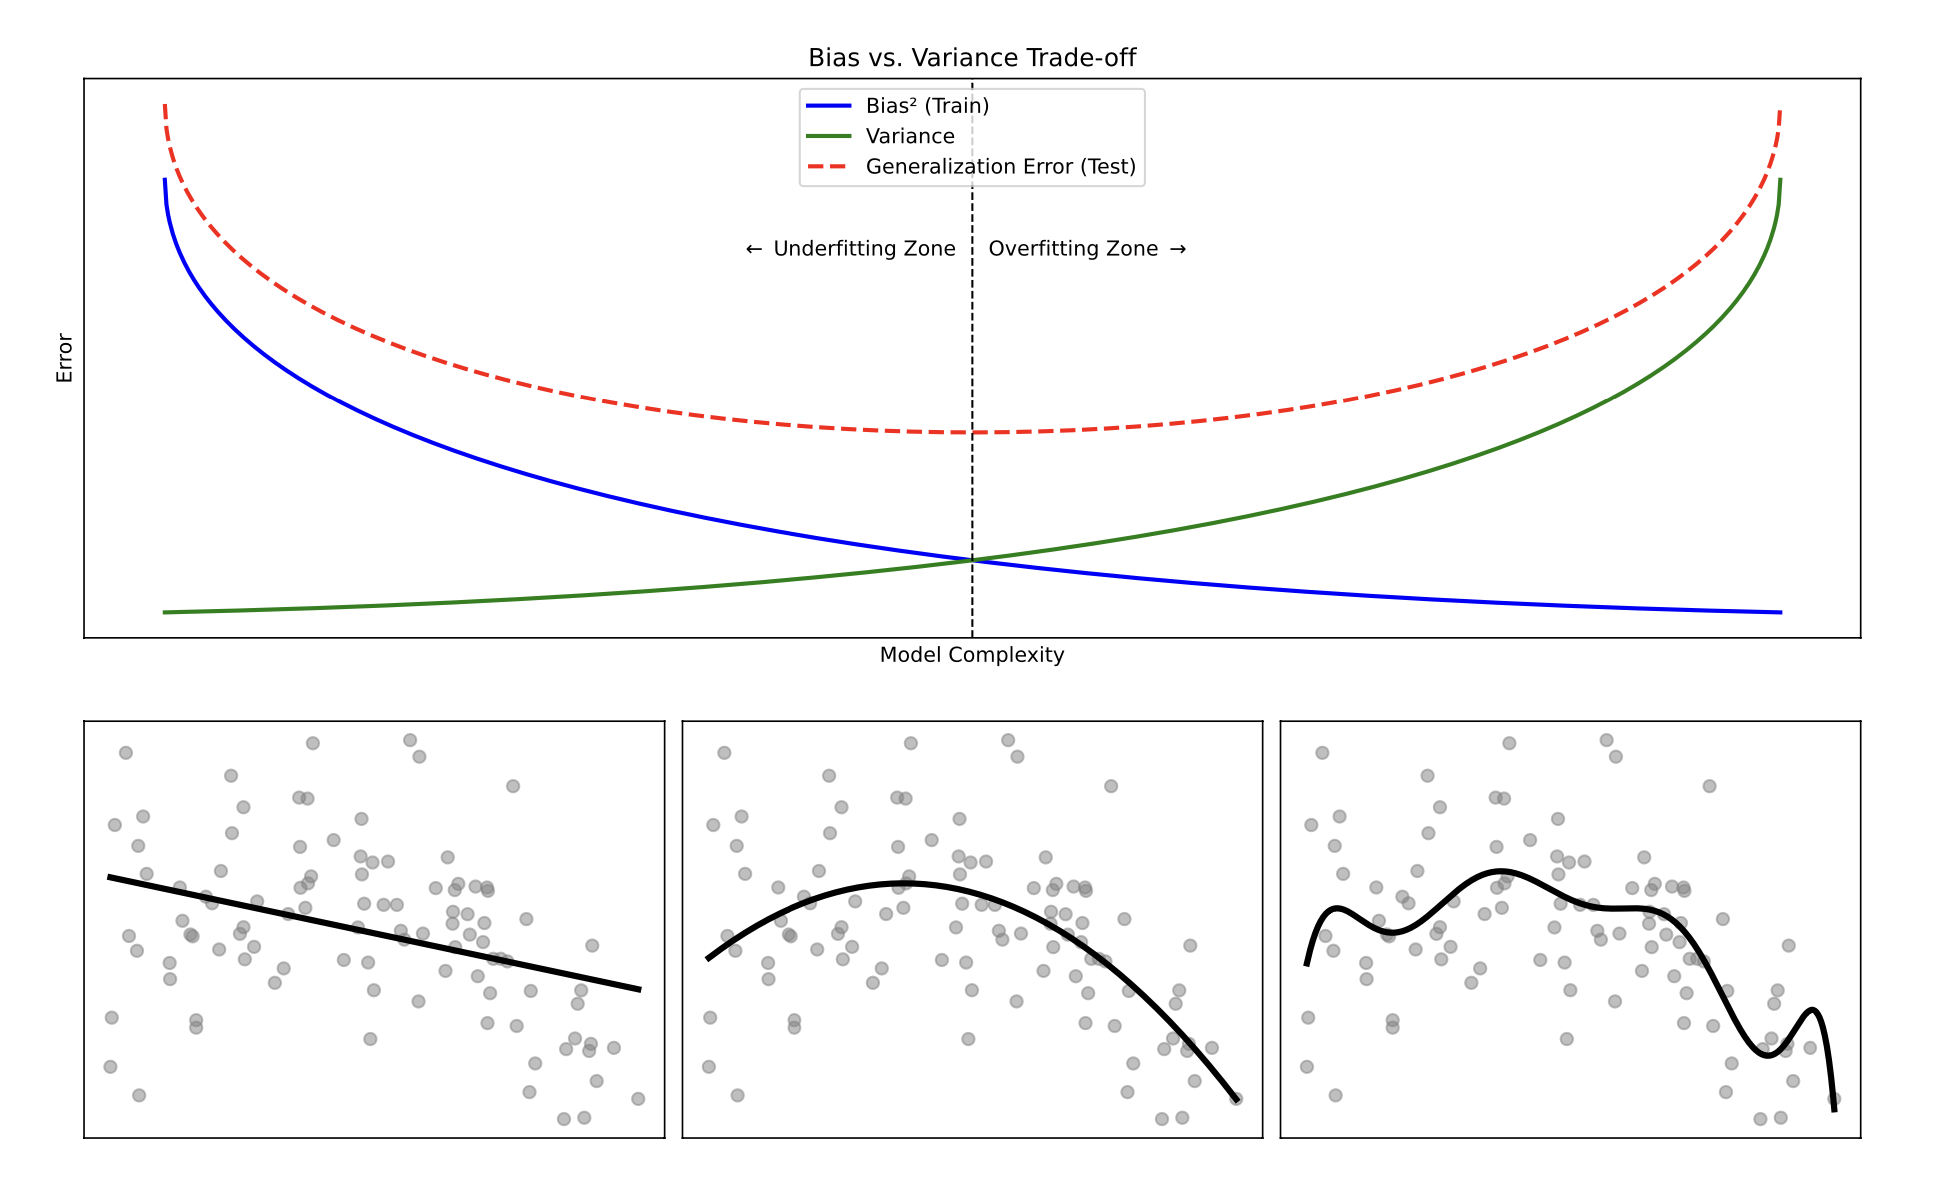

### **2.3. Regularized Linear Models**

As we saw in Chapters 1 and 2, a good way to reduce overfitting is to regularize the
model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be
for it to overfit the data. A simple way to regularize a polynomial model is to reduce
the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of
the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net,
which implement three different ways to constrain the weights.

#### **2.3.1. Ridge Regression**

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a ***regularization term*** equal to: 
$$
\alpha \sum_{i=1}^{n} \theta_i^2
$$

is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to use the unregularized performance measure to evaluate the model’s performance. The hyperparameter $\alpha$ oftentimes called the penalty strength, controls the magnitude of the regularization. 

With this penalty, we have the new loss function we should minimize:
$$
J(\theta) = \text{MSE}(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2
$$
Also note that it is important to scale the data when using the ridge regression to ensure that all the terms get regularized in the same order of magnitude. Thus, the new closed form equation is: 
$$
\hat{\theta} = (X^TX + \alpha I)^{-1} X^T y
$$
where $I$ is the $\left((n+1) \times (n+1)\right)$ identity matrix.

We can code the algorithm with this equation: 

In [291]:
from sklearn.preprocessing import StandardScaler

# data
#######

# we reload the data:
x = np.linspace(-10,10,1000)
y = quadra(x)

# polynomial features & train/test split
#########################################
k = 5
X = poly_1f(x, degree=k)
X = X[:, 1:] # we remove the bias term

# train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling
##########

x_train = x_train.reshape(-1, k)
x_test = x_test.reshape(-1, k)

# we create an instance of the StandardScaler:
scaler = StandardScaler()

# we fit the scaler on the training data:
x_train_scaled = scaler.fit_transform(x_train)

# we transform the test data:
x_test_scaled = scaler.transform(x_test)

# we add the bias term:
X_train_scaled = np.hstack((np.ones(len(x_train_scaled)).reshape(-1, 1), x_train_scaled))
X_test_scaled = np.hstack((np.ones(len(x_test_scaled)).reshape(-1, 1), x_test_scaled))

# reshaping the target:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


checking the shapes of the matrices

In [292]:
print(X_train_scaled[1, :])
print(X_train_scaled.shape)
print(y_train.shape)

[ 1.          0.12989037 -1.10422009  0.01301746 -0.75344757  0.01506273]
(800, 6)
(800, 1)


Now, when we compute the new gradient, we obtain this (computation done on whiteboard but it is almost the same thing as for the OLS):
$$
\nabla_{\theta} J(\theta) = \frac{2}{n} X^T (X\theta - y) + 2 \alpha \theta
$$
Thus, we implement a function with this ridge gradient, preparing the field for a mini-batch GD ridge regression:

In [293]:
def ridge_grad(X, y, theta, alpha): 
    n = len(X)
    gradient = (2/n) * X.T @ (X @ theta - y) + 2 * alpha * theta
    return gradient

Now, we perform a classic mini-batch gradient descent regression with one $\alpha$:

In [299]:
# we initialize the parameters:
t = 0
max_t = 2000
theta = np.zeros((X_train_scaled.shape[1], 1))
eta = 0.01
n = len(X_train_scaled)
alpha = 0.1 # the regularization parameter
batch_size = 20

# storing the values:
thetas = []
thetas.append(theta)

mse_losses = []
mse_losses.append(mse(y_train, X_train_scaled @ theta))

# we iterate over the number of epochs:
while t <= max_t and np.linalg.norm(ridge_grad(X_train_scaled, y_train, theta, alpha)) > 1e-10:
    
    # we select the random bacthes:
    rd_idx = np.random.choice(n, size=batch_size)
    batch_x = X_train_scaled[rd_idx]
    batch_y = y_train[rd_idx]

    # we compute the gradient on the batches:
    grad = ridge_grad(batch_x, batch_y, theta, alpha)

    # we update the parameters:
    theta = theta - eta * grad
    thetas.append(theta)

    # we compute the mse:
    mse_loss = mse(y_train, X_train_scaled @ theta)
    mse_losses.append(mse_loss)

    # we update the iteration:
    t += 1

print(theta)

[[-47.25002527]
 [ 15.20036616]
 [-23.41485075]
 [  5.12815912]
 [-12.52848897]
 [  0.1055984 ]]


Now that we have computed the vector $\theta$ with the polynomial features, we can plot the results:

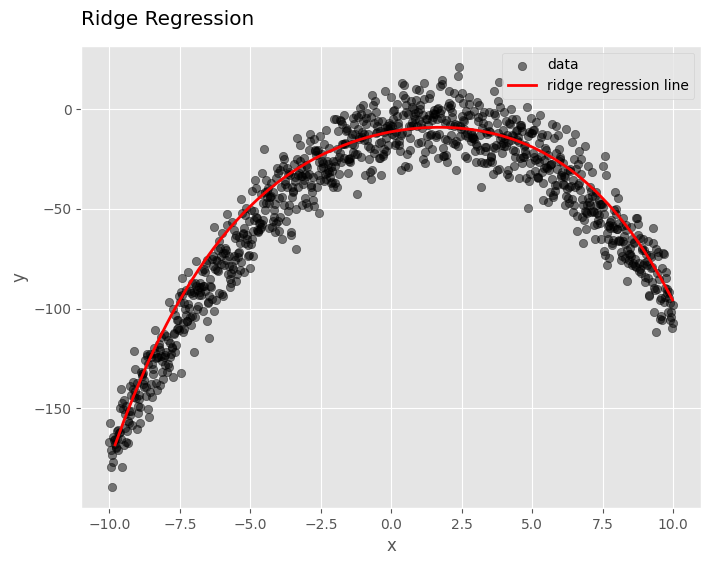

In [300]:
# the basis:
fig, ax = plt.subplots(figsize=(8,6))

# the data points:
ax.scatter(x, y, color='black', label='data', alpha=0.5)

# the linear regression line:
y_pred = X_test_scaled @ theta
x_plot = x_test[:, 0].reshape(-1, 1)
data = np.hstack((x_plot, y_pred))
data = data[data[:, 0].argsort()] # sort the data for plotting
x_plot = data[:, 0]
y_pred = data[:, 1]

ax.plot(x_plot, y_pred, color='red', label='ridge regression line', linewidth=2)

# aesthetics:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Ridge Regression', loc='left', pad=15)
ax.legend()
plt.show()

Now, we will observe how this plot change with different values of $\alpha$:

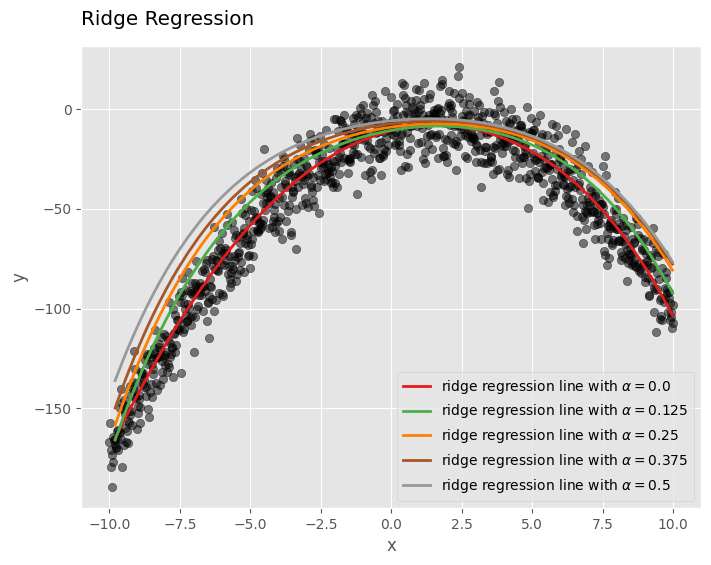

In [320]:
# we initialize the parameters:
max_t = 2000
eta = 0.01
n = len(X_train_scaled)
alphas = np.linspace(0, 0.5, 5) # the regularization parameter
batch_size = 20

# the basis:
fig, ax = plt.subplots(figsize=(8,6))

# the different colors:
colors = cm.Set1(np.linspace(0, 1, len(alphas)))
counter_color = 0

for alpha in alphas:

    t = 0
    theta = np.zeros((X_train_scaled.shape[1], 1))
    # the algorithm:
    while t <= max_t and np.linalg.norm(ridge_grad(X_train_scaled, y_train, theta, alpha)) > 1e-10:
        
        # we select the random bacthes:
        rd_idx = np.random.choice(n, size=batch_size)
        batch_x = X_train_scaled[rd_idx]
        batch_y = y_train[rd_idx]

        # we compute the gradient on the batches:
        grad = ridge_grad(batch_x, batch_y, theta, alpha)

        # we update the parameters:
        theta = theta - eta * grad
        thetas.append(theta)

        # we compute the mse:
        mse_loss = mse(y_train, X_train_scaled @ theta)
        mse_losses.append(mse_loss)

        # we update the iteration:
        t += 1

    # the linear regression line:
    y_pred = X_test_scaled @ theta
    x_plot = x_test[:, 0].reshape(-1, 1)
    data = np.hstack((x_plot, y_pred))
    data = data[data[:, 0].argsort()] # sort the data for plotting
    x_plot = data[:, 0]
    y_pred = data[:, 1]

    ax.plot(x_plot, y_pred, label=fr'ridge regression line with $\alpha = {alpha}$', linewidth=2, color=colors[counter_color])
    ax.legend()
    counter_color += 1


# the data points:
ax.scatter(x, y, color='black', label='data', alpha=0.5)

# aesthetics:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Ridge Regression', loc='left', pad=15)
plt.show()


In this case, we see that the quality of the fit depends on the choice of the penalty $\alpha$. Therefore, when using the ridge regression, it is also important to perform a cross validation round to choose the optimal $\alpha$ value.

#### **2.3.2. Lasso Regression**

Least Absolute Shrinkage and Selection Operator Regression (usually simply called
Lasso Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the $\mathcal{l}_1$ norm
of the weight vector instead of half the square of the $\mathcal{l}_2$ norm. Here is the lasso loss function with mse: 
$$
J(\theta) = \text{MSE}(\theta) = \alpha \sum_{i=1}^{n} |\theta_i|
$$

An important characteristic of Lasso Regression is that it **tends to eliminate the
weights of the least important features** (i.e., set them to zero). For example, the
dashed line in the righthand plot in Figure 4-18 (with α = 10-7) looks quadratic,
almost linear: all the weights for the high-degree polynomial features are equal to
zero. In other words, Lasso Regression automatically performs feature selection and
outputs a sparse model (i.e., with few nonzero feature weights).

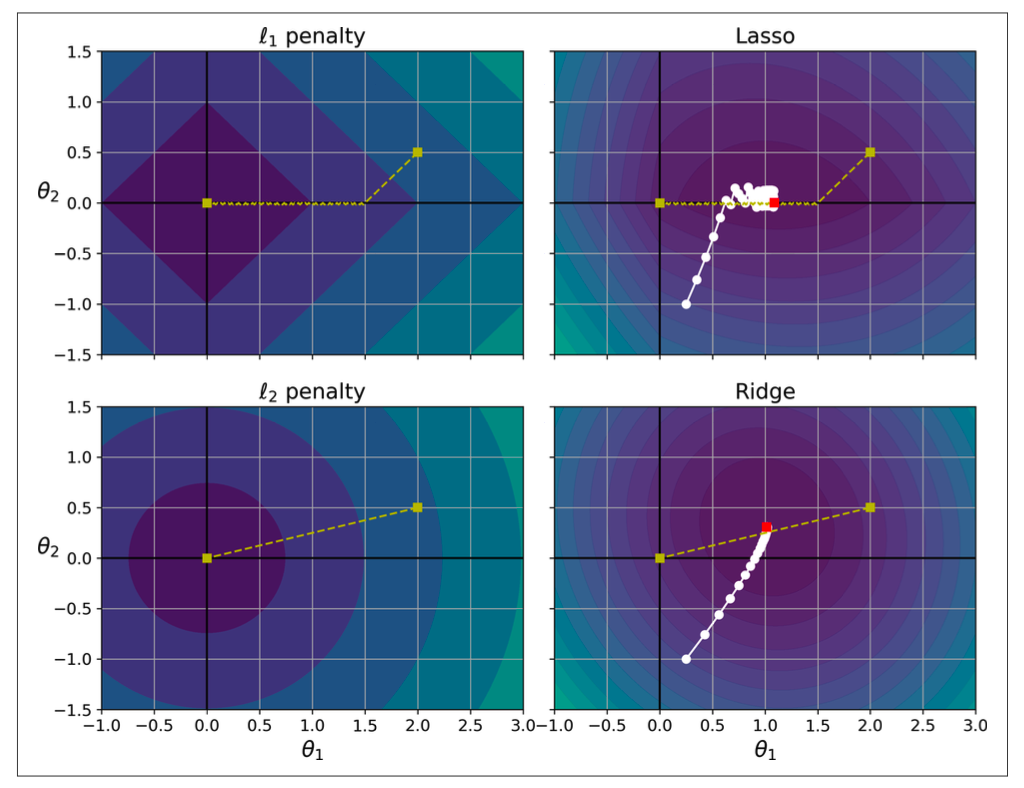

##### 🔴 **Subgradient for Lasso**

A subgradient vector is a generalization of the gradient for functions that are not differentiable at certain points. It is particularly useful in convex optimization problems involving nonsmooth functions, like the Lasso regression.

**Definition of Subgradient**

For a convex function  $f: \mathbb{R}^n \to \mathbb{R}$ , the subgradient at a point  $x$  is any vector  $g$  such that for all  $y$ :

$$
f(y) \geq f(x) + g^T (y - x)
$$

The set of all such subgradients at  $x$  is called the subdifferential, denoted as:


$\partial f(x)$


If  $f$  is differentiable at  $x$ , then the subdifferential contains only one vector: the gradient  $\nabla f(x)$ . If  $f$  is nonsmooth, the subdifferential can contain multiple vectors. And since the $\mathcal{l}_1$ norm is not differentiable at $\theta_i = 0$ (absolute value), we use a subgradient which is defined as: 
$$
g(\theta, J) = \nabla \text{MSE}(\theta) + \alpha \begin{bmatrix} 
                                                    \text{sign}(\theta_1) \\
                                                    \text{sign}(\theta_2) \\
                                                    \cdots \\
                                                    \text{sign}(\theta_n) \\
                                                    \end{bmatrix}
$$
where: 
$$
              \text{sign}(\theta_i) =               \begin{cases}
                                                     -1\quad  \text{ if }\quad \theta_i < 0 \\
                                                     0 \quad\text{ if } \quad\theta_i = 0 \\
                                                     1 \quad\text{ if }\quad \theta_i > 0 \\
                             \end{cases}
$$

While we could absolutely code roughly the same example as we did for the Ridge regression, we can also decide to take a shortcut (not recommended for learning effectively though) and directly implement the lasso regression with `scikit-learn`:

In [327]:
from sklearn.linear_model import Lasso 

# we create an instance of the Lasso class: 
lasso = Lasso(alpha=0.1, fit_intercept=False)

# we fit the model:
lasso.fit(X_train_scaled, y_train)

# the parameters:
theta = lasso.coef_
theta = theta.reshape(-1, 1)
theta

array([[-51.87114952],
       [ 21.36296735],
       [-36.70196713],
       [ -0.        ],
       [ -0.58929188],
       [ -0.        ]])

And it is interesting to confirm that some paramters have been shrinked by the Lasso as it was mentionned in the above explanation. This is a form a feature selection. Of course, we can also use the model to make some predictions: 

In [328]:
y_pred = lasso.predict(X_test_scaled)

# we evaluate the rmse:
rmse = np.sqrt(mse(y_test, y_pred))
float(rmse)

10.71550203270973

And the plot of the regression line: 

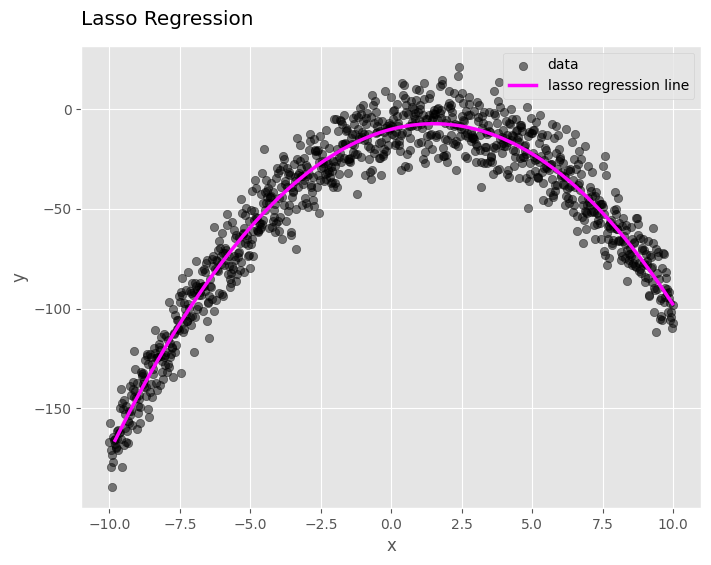

In [332]:
# the basis:
fig, ax = plt.subplots(figsize=(8,6))

# the data points:
ax.scatter(x, y, color='black', label='data', alpha=0.5)

# the linear regression line:
y_pred = X_test_scaled @ theta
x_plot = x_test[:, 0].reshape(-1, 1)
data = np.hstack((x_plot, y_pred))
data = data[data[:, 0].argsort()] # sort the data for plotting
x_plot = data[:, 0]
y_pred = data[:, 1]

ax.plot(x_plot, y_pred, color='magenta', label='lasso regression line', linewidth=2.5)

# aesthetics:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Lasso Regression', loc='left', pad=15)
ax.legend()
plt.show()


#### **2.3.3. Elastic Net**

The *elastic net* is a regularization technique that allows us to jungle with both Ridge and Lasso. A formulation often used in practice defines a single hyperparameter  $\alpha$  and a mixing parameter  $\rho$, such that the cost function becomes: 

$$
J(\theta) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - X_i\theta)^2 + \alpha \left( \rho \|\theta\|_1 + (1 - \rho) \|\theta\|_2^2 \right)
$$

where:
+ $\alpha$  controls the overall regularization strength.
+ $\rho \in [0,1]$  determines the balance between Lasso ( $\rho = 1$ ) and Ridge ( $\rho = 0$ ).

Again, we can implement this technique very effectively with `scikit-learn`: 

In [335]:
from sklearn.linear_model import ElasticNet

# we create an instance of the ElasticNet class:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, fit_intercept=False) # l1 ratio refers to the rho parameter

# we fit the model:
elastic.fit(X_train_scaled, y_train)

# the parameters:
theta = elastic.coef_
theta = theta.reshape(-1, 1)
theta

array([[-49.44871383],
       [ 17.4746089 ],
       [-26.51245107],
       [  3.85281994],
       [ -9.88737371],
       [ -0.61506067]])

### **2.3.4. Early Stopping**

A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum. This is
called early stopping. The figure below shows a complex model (in this case, a high-degree
Polynomial Regression model) being trained with Batch Gradient Descent. As the
epochs go by the algorithm learns, and its prediction error (RMSE) on the training
set goes down, along with its prediction error on the validation set. After a while
though, the validation error stops decreasing and starts to go back up. This indicates
that the model has started to overfit the training data. With early stopping you just
stop training as soon as the validation error reaches the minimum. It is such a simple
and efficient regularization technique that Geoffrey Hinton called it a “beautiful free
lunch.”

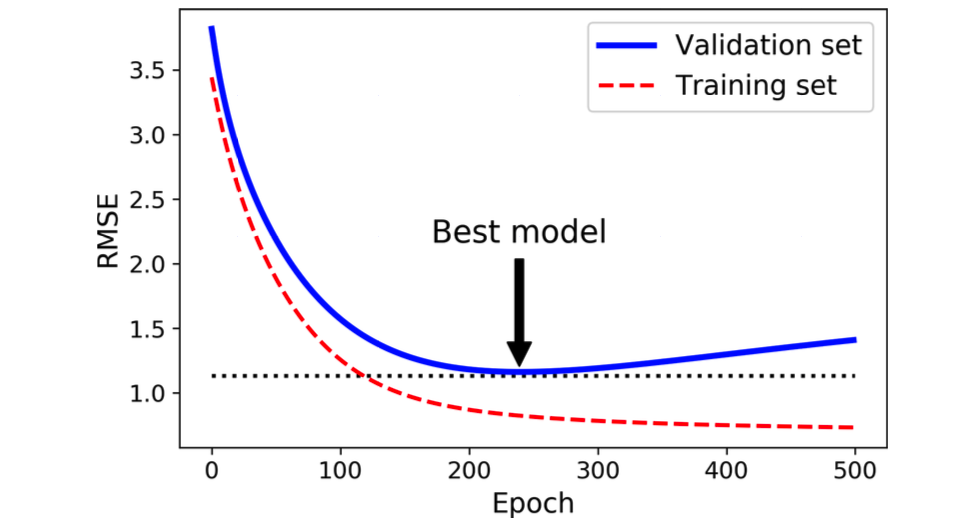

**🔴 WARNING**  

With Stochastic and Mini-batch Gradient Descent, the curves are
not so smooth, and it may be hard to know whether you have
reached the minimum or not. One solution is to stop only after the
validation error has been above the minimum for some time (when
you are confident that the model will not do any better), then roll
back the model parameters to the point where the validation error
was at a minimum.

Based on this description, let's create our own early stopping algorithm: 

In [338]:
# reload the data:
x = np.linspace(-10,10,1000)
y = quadra(x)
X = poly_1f(x, degree=5)
X = X[:, 1:] # we remove the bias term

# train and test data: 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling
##########
x_train = x_train.reshape(-1, 5)
x_test = x_test.reshape(-1, 5)

# we create an instance of the StandardScaler:
scaler = StandardScaler()

# we fit the scaler on the training data:
x_train_scaled = scaler.fit_transform(x_train)

# we transform the test data:
x_test_scaled = scaler.transform(x_test)

# we add the bias term:
X_train_scaled = np.hstack((np.ones(len(x_train_scaled)).reshape(-1, 1), x_train_scaled))
X_test_scaled = np.hstack((np.ones(len(x_test_scaled)).reshape(-1, 1), x_test_scaled))

# reshaping the target:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)



This time, we implement a basic learning schedule to decay the learning rate:

In [396]:
def step_decay(epoch, eta_0, drop=0.5, epochs_drop=10):
    return eta_0 * (drop ** (epoch // epochs_drop)) + 1e-6

Now, we implement the main algorithm:

In [426]:
# the time 
max_t = 500 # max convergence time per epoch

# the epochs
max_epoch = 100
epochs_drop = 10
epochs = np.arange(0, max_epoch)

# the initial learning rate
eta_t = 0.1
etas = []
etas.append(eta_t)

# the parameters
n = len(X_train_scaled)
batch_size = 40

# the trigger for the early stopping mechanism:
patience = 8
best_loss = np.inf

# we track the thetas: 
thetas = []
theta = np.zeros((X_train_scaled.shape[1], 1))
thetas.append(theta)

# we should also track the mse for each epoch:
mse_losses = []

# the seed 
np.random.seed(42)

# the algorithm:
#################

for epoch in epochs:

    t = 0

    while t <= max_t and np.linalg.norm(gradient(X_train_scaled, y_train, theta)) > 1e-10: # grad function from the linreg

        # we select the random bacthes:
        rd_idx = np.random.choice(n, size=batch_size)

        # the batch:
        batch_x = X_train_scaled[rd_idx]
        batch_y = y_train[rd_idx]

        # we compute the gradient on the batches:
        grad = gradient(batch_x, batch_y, theta)

        # we update the parameters:
        theta = theta - eta_t * grad

        # we update the time:
        t += 1

    # update the learning rate:
    eta_t = step_decay(epoch, eta_t, drop=0.5, epochs_drop=epochs_drop)
    etas.append(eta_t)

    # we store the theta:
    thetas.append(theta)

    # we compute the mse on the test set (which could be our validation set):
    '''
    If we wanted to have a thorough approach, we would have to split 
    the data into a training, validation and test set. However, here we 
    simplify the process by using the test set as a validation set.
    '''
    mse_loss = mse(y_test, X_test_scaled @ theta)
    mse_losses.append(mse_loss)

    # early stopping mechanism 
    ############################

    epoch_without_improvement = 0
    
    # Check if we have a new best model
    if mse_loss < best_loss:
        best_loss = mse_loss
        best_theta = theta.copy()
        epochs_without_improvement = 0
        
    else:
        epochs_without_improvement += 1
    
    if epochs_without_improvement >= patience:
        print(f'Early stopping at epoch {epoch}')
        break
    


Early stopping at epoch 22


Here, we see that we allowed for: 
```python
max_epoch = 100
```
but because of the early stopping mechanism we implemented, the algorithm only runned during $22$ epochs. We can observe how the parameters behaved: 

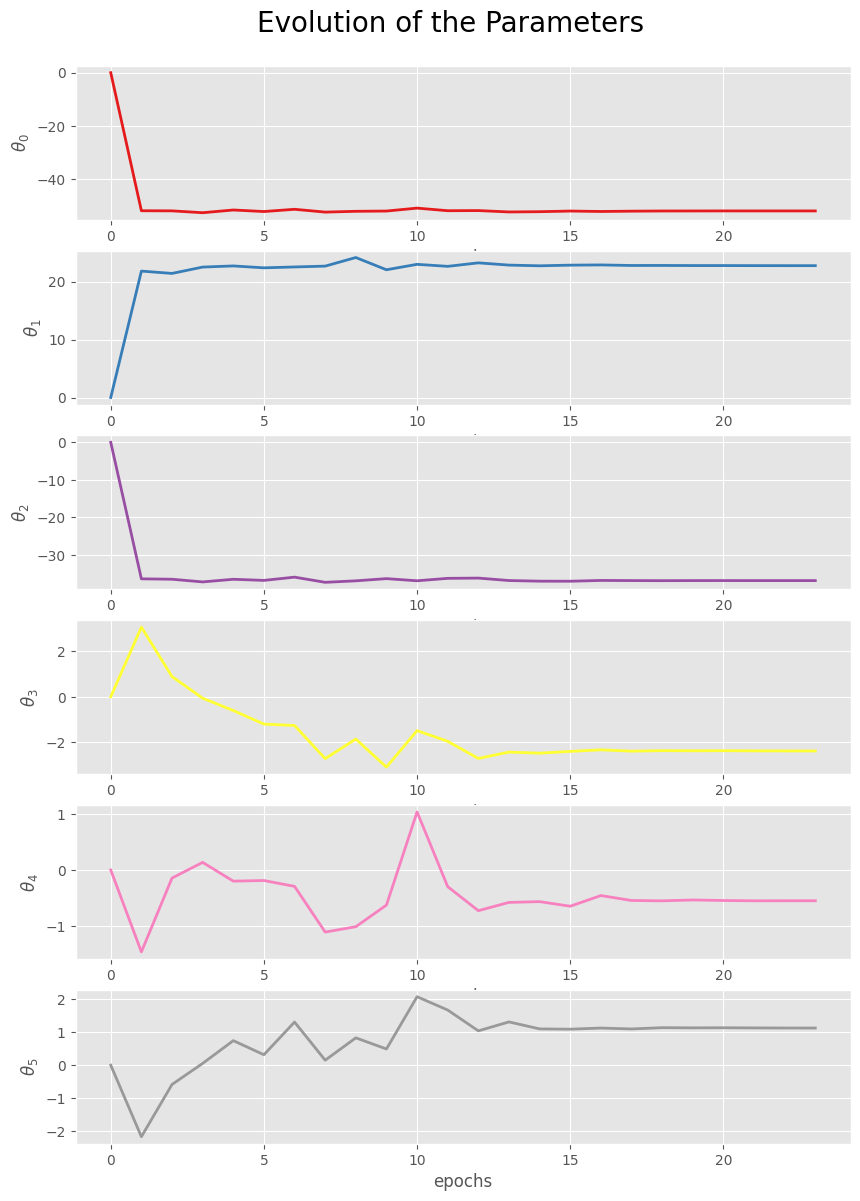

In [438]:
number_of_para = best_theta.shape[0]

# the basis:
fig, ax = plt.subplots(number_of_para, 1, figsize=(10,14))

# the different colors:
colors = cm.Set1(np.linspace(0, 1, number_of_para))

for i in range(number_of_para):
    # the evolution of the parameters
    ax[i].plot([theta[i] for theta in thetas], color=colors[i], linewidth=2)

    # aesthetics
    ax[i].set_ylabel(fr'$\theta_{i}$')
    ax[i].set_xlabel('epochs')

plt.suptitle('Evolution of the Parameters', fontsize=20, y=0.92)
plt.show()

And how the rmse evolved: 

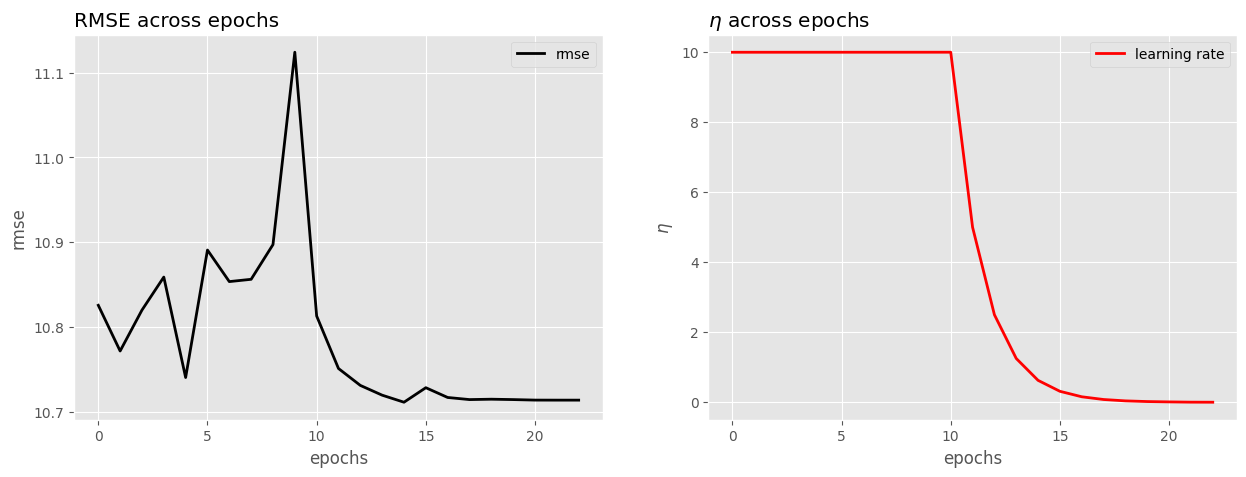

In [455]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# the line
ax[0].plot(epochs[:epoch+1], np.sqrt([mse for mse in mse_losses]), color='black', linewidth=2, label='rmse')

# the learning rate scaled:
ax[1].plot(epochs[:epoch+1], [100*eta for eta in etas[:-1]], color='red', linewidth=2, label='learning rate')

# aesthetics 1
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('rmse')
ax[0].set_title('RMSE across epochs', loc='left')
ax[0].legend()

# aesthetics 2
ax[1].set_xlabel('epochs')
ax[1].set_ylabel(r'$\eta$')
ax[1].set_title(r'$\eta$ across epochs', loc='left')
ax[1].legend()
plt.show()